# Image Pre-processing
### On this notebook, we will do:
    1. A bit of data exploration
    2. Image pre-processing to get images without petri-dish border and without dish background numbers annotated in blue (in the case of 'Serial' type images).
    
#### Removing Petri dish border will allow us to better be able to identify regions / areas within the pretri-dish, where the bacterial colonies are found.

### Images Dataset

The dataset consists of 'jpeg' pictures of bacteria colonies collected from soil samples on 10 different locations (referred to as locations C1-C10) in various parks in Manhattan. Pictures correspond to scanned images of Petri dishes cotaining the bacteria colonies, captured by Epson scanner at resolution ranging from 400 to 3200 dpi.  

Data was organized on different folders corresponding to 3 different types of images taken at 8 different times, explained as follows:

- Type **“Serial”** corresponds to images of a single petri dish containing well-separated colonies of the same bacteria species but at 9 different concentrations, which were allowed to grow over time.

- Type **“Control”** corresponds to images where a single drop of a bacteria species was dropped in the petri dish at a specific concentration (instead of 9 different concentrations like in the case of “Serial” type). This was done with the purpose of checking if having several colonies in the same petri dish has any influence in the growing patterns vs having a single colony so the algorithm could learn from both situations.

- Type **“Streak”** corresponds to multiple drops but is where the streaks (linear pattern) is drawn across the petri dish with pipettes with different concentrations.

For each of the 3 types described above, images were taken during 4 different days, 2 collections each day (AM and PM, 12 hours apart), for a total of 8 different timestamps. This will be useful for the bacteria classification model to learn different patterns of colonies form the same species, over different growing times.

Colonies for each location were classified using conventional time-consuming classification methods and they were found 7 different bacterial species. It was found that locations 'C2' and 'C3' correspond to the same bacterial species, same that locations 'C4' and 'C7', as well as locations 'C8' and 'C10'.

Timestamps, locations and image type are included within each image filename. As example, '7-10_PM_P1C1_Serial.jpg' correponds to a image taken on 7/10 during PM hours, location 'C1', image type Serial. 

Additional images of petri dishes from different species on the same plate will be provided later for model testing purposes (goal is to classify these).

Training images can be downloaded from this [link](https://drive.google.com/open?id=116Iu8uSJcEYCIJd5cMJmms9B-bvQ5AG4) (200 images, about 100MB size).

### Data was already downloaded into the Git Repository, in the folder '../Data', which contains the following subfolders:
    1. Serial: Folder containing all 'Serial' type images.
    2. Control: Folder containing all 'Control' type images.
    3. Streak: Folder containing all 'Streak' type images.

### Let's import necessary libraries / modules:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import cv2
import shutil

%matplotlib inline
%reload_ext autoreload
%autoreload 2

### Helper Function: get a list of 'complete' file paths of all images in a given folder:

In [2]:
def get_files(folder):
    """
    Returns a list of file_paths for each file in the specified folder. 
    :param folder: The folder where files are located.
    :return: A list of file_paths for each file in the specified folder.
    """
    files = os.listdir(folder)
    paths = []
    for x in files:
        paths.append(os.path.join(folder, x))
    return paths

### Let's see what sizes of images we have in the dataset:

In [3]:
folder = '../Data/Serial'

files = get_files(folder) # Returns array of all file_paths in the specified folder.
img_sizes = []

for im in files:
    img = Image.open(im) # from PIL import Image
    size = img.size
    if size not in img_sizes:
        img_sizes.append(size)
print('\n', 'Image Sizes: ', img_sizes)


 Image Sizes:  [(3200, 4000), (1660, 1676)]


#### For 'Serial' type, we have more than one size, let's visualizeone image for each size:

../Data/Serial/7-10_AM_P1C10_Serial.jpg Image Size (3200, 4000) :


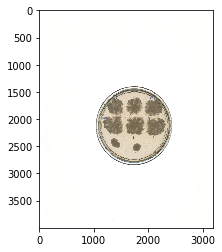

../Data/Serial/7-10_PM_P1C1_Serial.jpg Image Size (1660, 1676) :


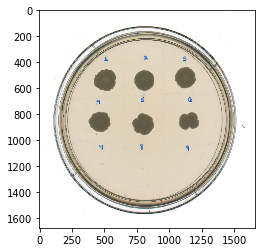

In [4]:
printed = []
for im in files:
    img = Image.open(im) # from PIL import Image
    size = img.size
    if size not in printed:
        print(im, 'Image Size', size, ':')     
        plt.imshow(np.asarray(img))
        plt.show()
        printed.append(size) 

In [5]:
folder = '../Data/Streak'

files = get_files(folder) # Returns array of all file_paths in the specified folder.
img_sizes = []

for im in files:
    img = Image.open(im) # from PIL import Image
    size = img.size
    if size not in img_sizes:
        img_sizes.append(size)
print('\n', 'Image Sizes: ', img_sizes)


 Image Sizes:  [(3200, 4000)]


In [6]:
folder = '../Data/Control'

files = get_files(folder) # Returns array of all file_paths in the specified folder.
img_sizes = []

for im in files:
    img = Image.open(im) # from PIL import Image
    size = img.size
    if size not in img_sizes:
        img_sizes.append(size)
print('\n', 'Image Sizes: ', img_sizes)


 Image Sizes:  [(3200, 4000)]


## Remove petri-dish border from 'Control' type Images.

#### To remove border, we will identify circles' center and radius using ['Hough Circle Transform'](https://docs.opencv.org/master/d3/de5/tutorial_js_houghcircles.html) from OpenCV library, then keep only the image within the identified circles.

../Data/Control/7-11_PM_P1C5_Control.jpg


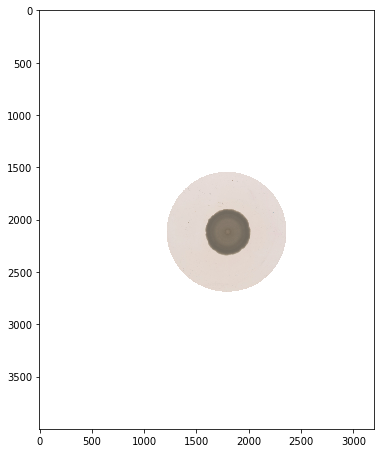

../Data/Control/7-10_PM_P1C10_Control.jpg


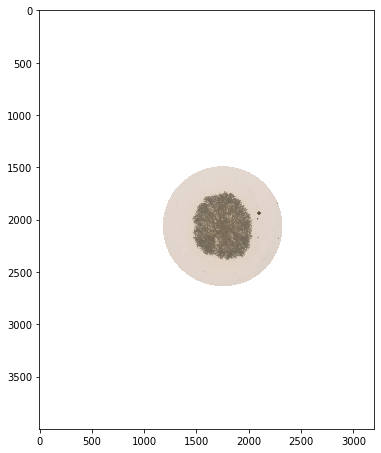

../Data/Control/7-10_PM_P1C1_Control.jpg


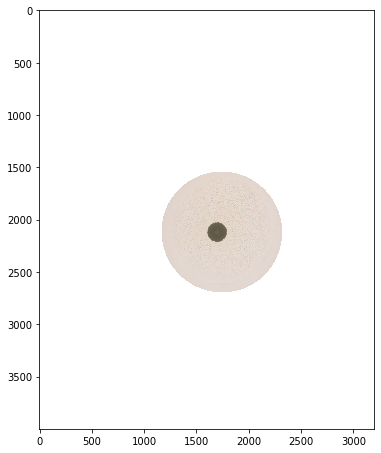

../Data/Control/7-10_PM_P1C2_Control.jpg


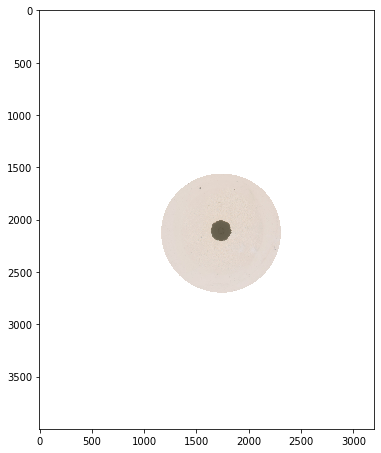

../Data/Control/7-10_PM_P1C3_Control.jpg


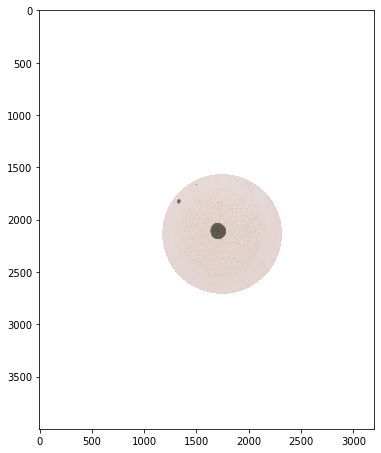

../Data/Control/7-10_PM_P1C4_Control.jpg


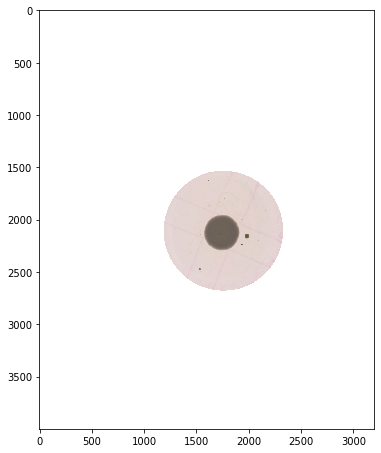

../Data/Control/7-10_PM_P1C5_Control.jpg


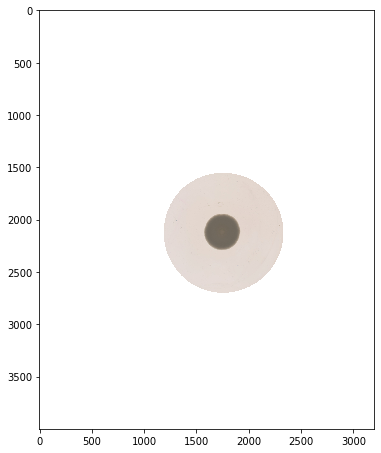

../Data/Control/7-10_PM_P1C6_Control.jpg


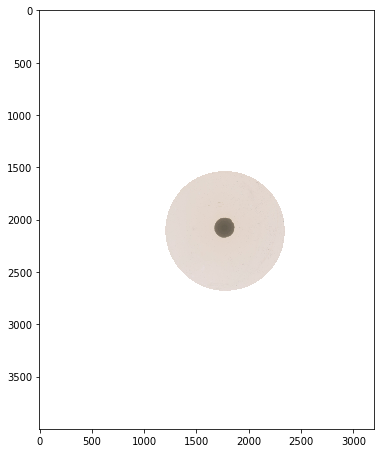

../Data/Control/7-10_PM_P1C7_Control.jpg


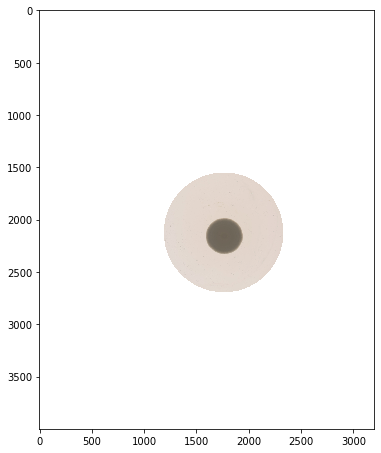

../Data/Control/7-10_PM_P1C8_Control.jpg


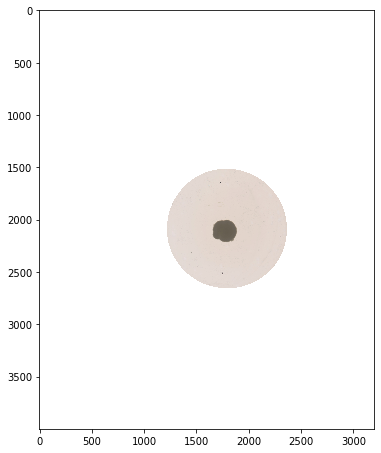

../Data/Control/7-10_PM_P1C9_Control.jpg


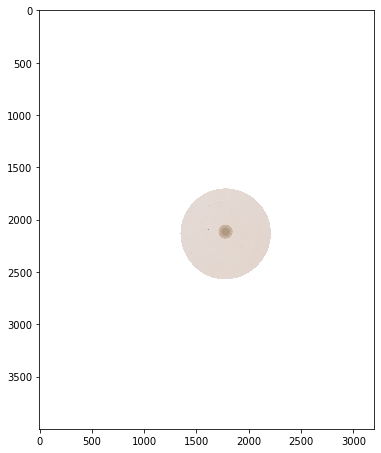

../Data/Control/7-11_PM_P1C10_Control.jpg


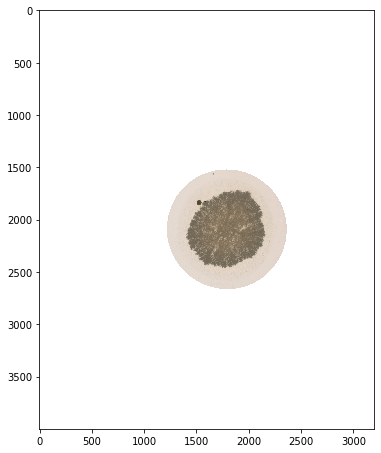

../Data/Control/7-11_PM_P1C1_Control.jpg


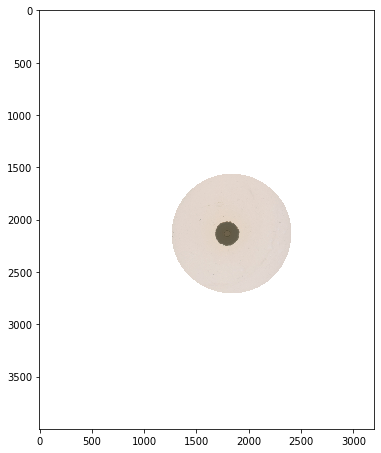

../Data/Control/7-11_PM_P1C2_Control.jpg


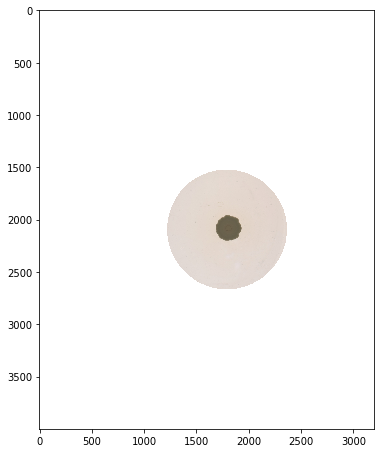

../Data/Control/7-11_PM_P1C3_Control.jpg


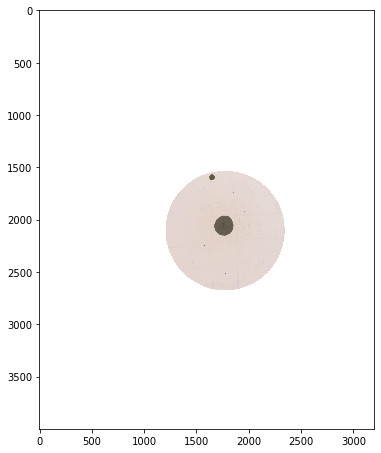

../Data/Control/7-11_PM_P1C4_Control.jpg


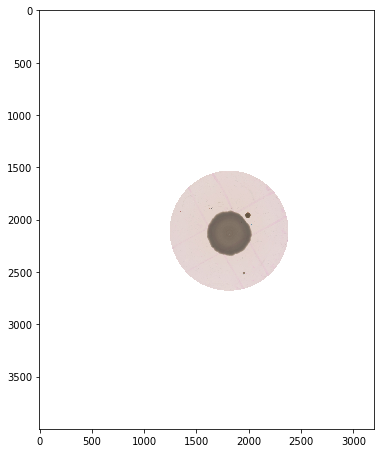

../Data/Control/7-11_PM_P1C6_Control.jpg


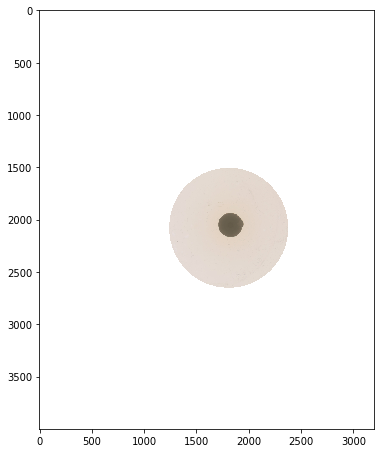

../Data/Control/7-11_PM_P1C7_Control.jpg


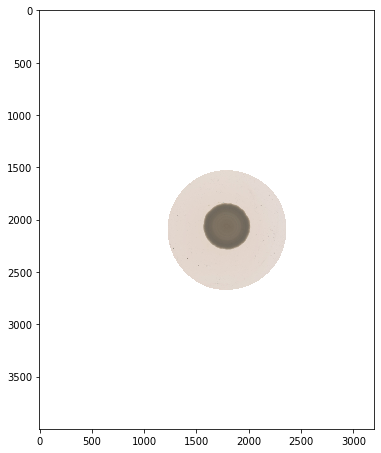

../Data/Control/7-11_PM_P1C8_Control.jpg


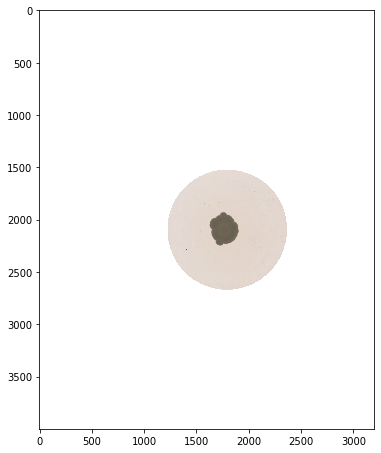

../Data/Control/7-11_PM_P1C9_Control.jpg


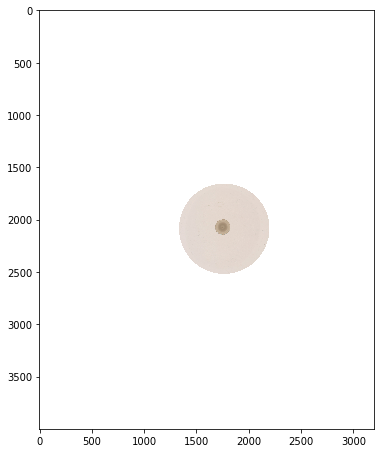

../Data/Control/7-12_PM_P1C10_Control.jpg


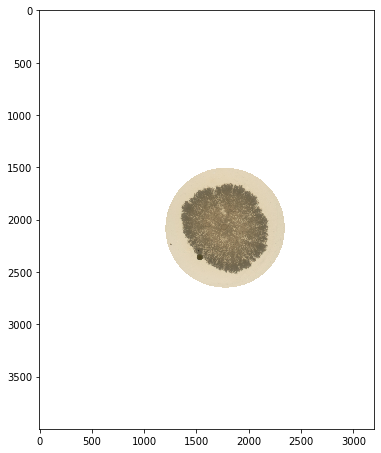

../Data/Control/7-12_PM_P1C1_Control.jpg


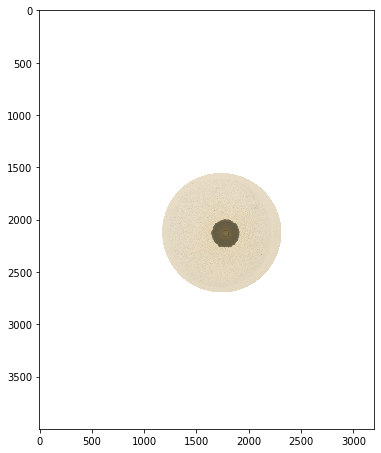

../Data/Control/7-12_PM_P1C2_Control.jpg


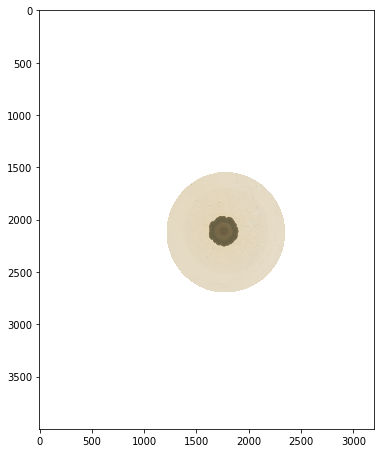

../Data/Control/7-12_PM_P1C3_Control.jpg


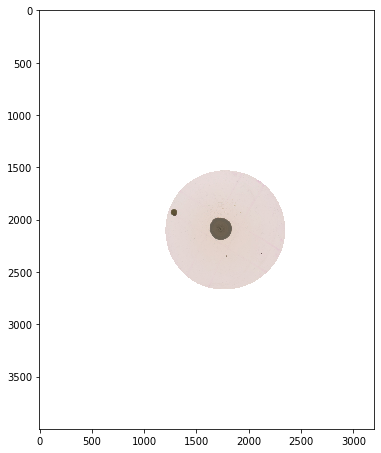

../Data/Control/7-12_PM_P1C4_Control.jpg


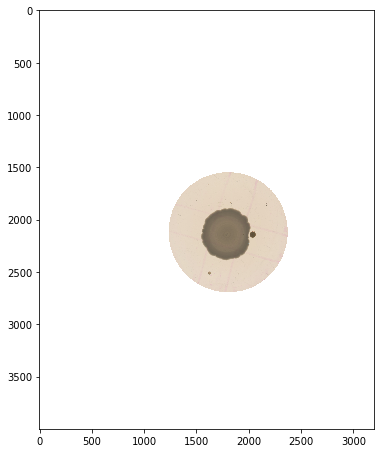

../Data/Control/7-12_PM_P1C5_Control.jpg


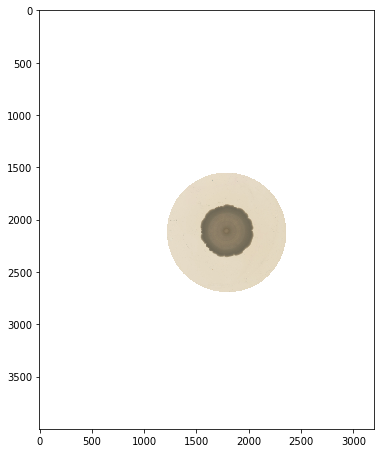

../Data/Control/7-12_PM_P1C6_Control.jpg


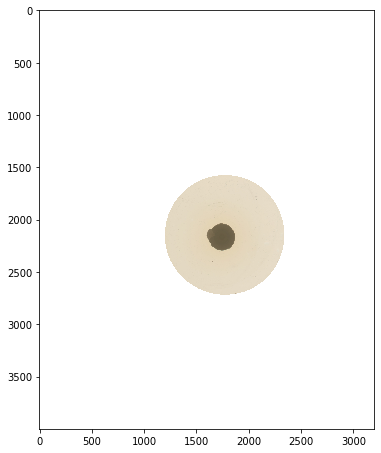

../Data/Control/7-12_PM_P1C7_Control.jpg


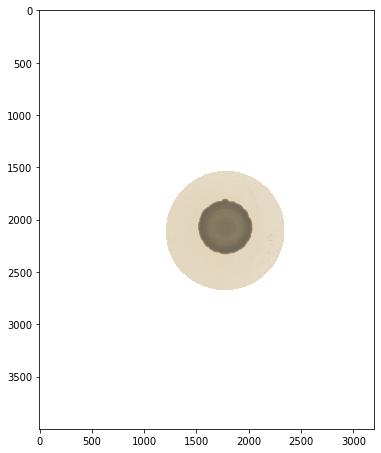

../Data/Control/7-12_PM_P1C8_Control.jpg


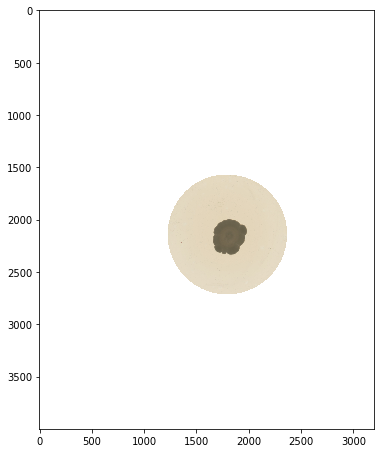

../Data/Control/7-12_PM_P1C9_Control.jpg


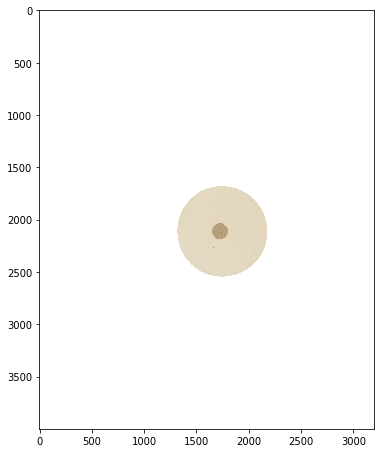

../Data/Control/7-9_PM_P1C10_Control.jpg


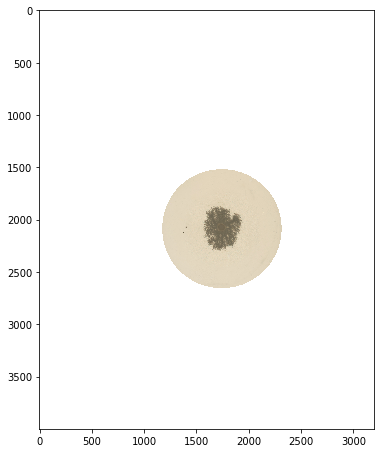

../Data/Control/7-9_PM_P1C1_Control.jpg


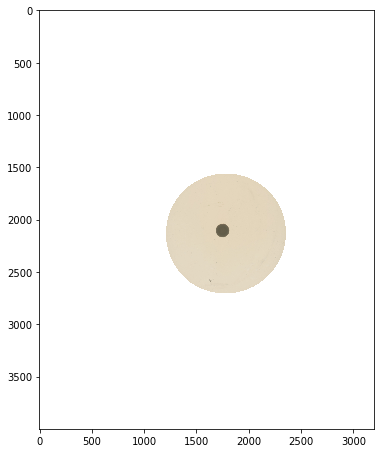

../Data/Control/7-9_PM_P1C2_Control.jpg


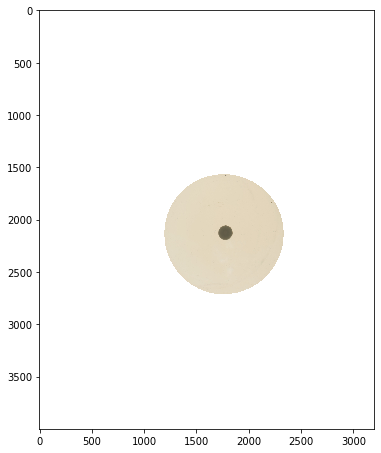

../Data/Control/7-9_PM_P1C3_Control.jpg


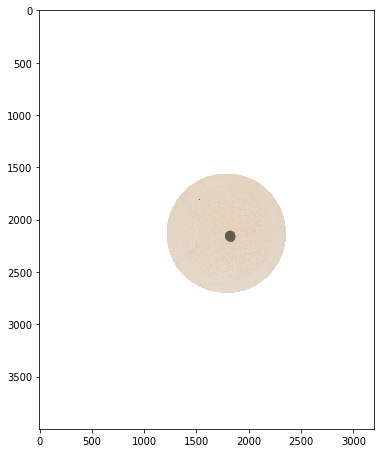

../Data/Control/7-9_PM_P1C4_Control.jpg


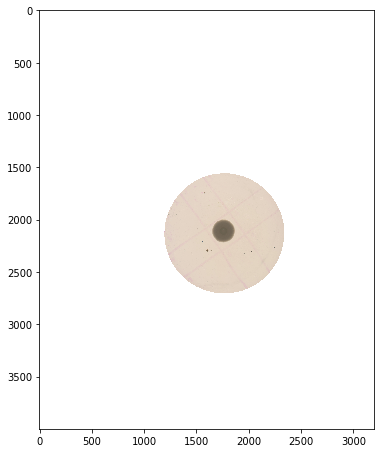

../Data/Control/7-9_PM_P1C5_Control.jpg


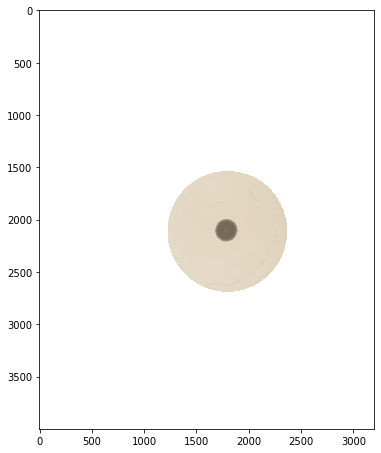

../Data/Control/7-9_PM_P1C6_Control.jpg


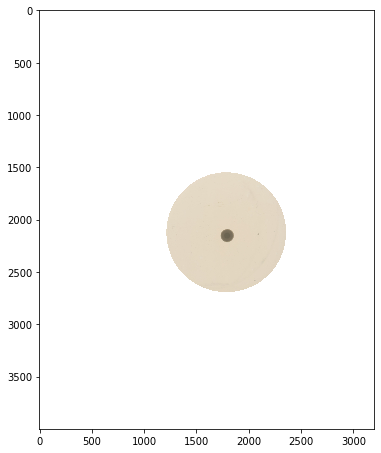

../Data/Control/7-9_PM_P1C7_Control.jpg


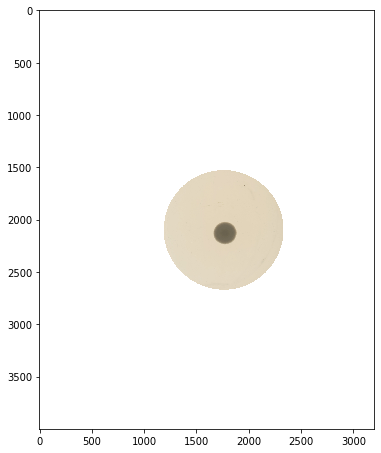

../Data/Control/7-9_PM_P1C8_Control.jpg


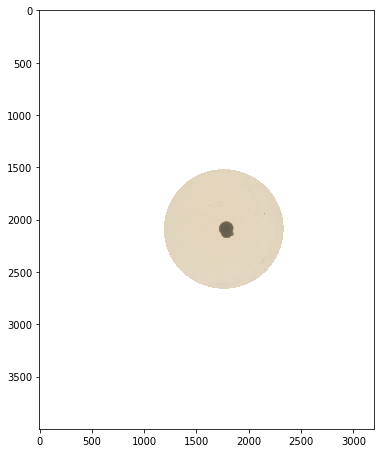

../Data/Control/7-9_PM_P1C9_Control.jpg


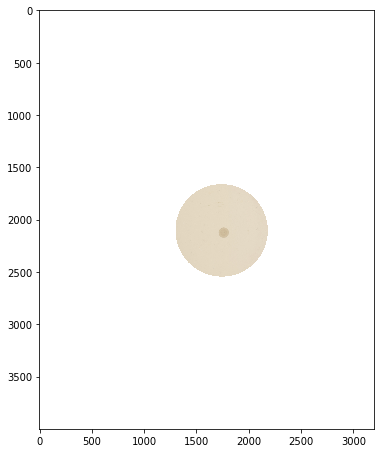

In [7]:
"""BE CAREFUL, this will replace previously pre-processed 'Control' images"""

if 'no_dish_border' not in os.listdir('../Data'):
    os.mkdir('../Data/no_dish_border')
if 'Control' not in os.listdir('../Data/no_dish_border'):
    os.mkdir('../Data/no_dish_border/Control')

folder = '../Data/Control'
files = get_files(folder) # Returns array of all file_paths in the specified folder.
  
for im in files:
    print(im)
    img = cv2.imread(im, cv2.IMREAD_GRAYSCALE)
    shape = img.shape
    
    """Identify circles within each image:"""
    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, dp=1.5, minDist=1e-12,
                               param1=535, param2=500, minRadius=620, maxRadius=750)       
        
    """create circles mask"""
    mask = np.zeros(img.shape) # Black image as initial mask. We will paint white outside the circles
    for x, y, r in circles[0]: # For each circle from the identified circles
        white = np.ones(img.shape, dtype=np.uint8)*255 # Create a 'white' image
        p = 40 # parameter to cut images. Adjusted for each location to ensure we completely remove borders
        if 'C9' in im: p = 180 # to entriely remove the contamination in growing in Control/C9
        cv2.circle(white, (x,y), int(r-p), 0, -1)  # 0, to paint black, -1 to draw black filled circles
        white[mask==255] = 0 # We won't add white pixels where there are already white pixels in the mask 
        mask = mask + white # Mask was black. Now pixels outside of circle will be white
        
    
    """In original image, remove pixels outside circles mask"""
    mask = mask.astype(int)
    color_img = cv2.imread(im)
    color_img[mask!=0] = 255 # set all pixels outside the mask, to white color
    
    """show results and save image into folder '../Data/no_dish_border'"""
    plt.figure(figsize=(6,8))
    plt.imshow(color_img[:, :, [2, 1, 0]]) # From BGR to RGB
    plt.show()
    save_path = '../Data/no_dish_border' + im[7:]
    cv2.imwrite(save_path, color_img)

## Remove dish border and background blue numbers from 'Serial' type Images.

#### To remove background blue numbers, we will use  ['inRange'](https://docs.opencv.org/3.4/da/d97/tutorial_threshold_inRange.html) function, also  from OpenCV library.

../Data/Serial/7-10_AM_P1C10_Serial.jpg


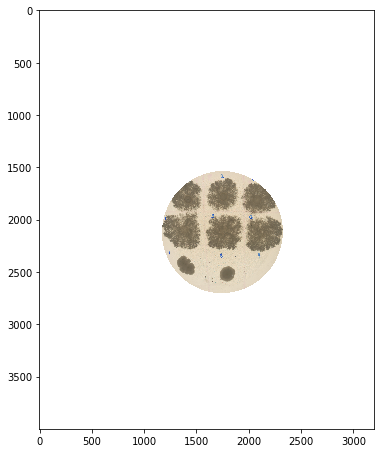

../Data/Serial/7-10_AM_P1C1_Serial.jpg


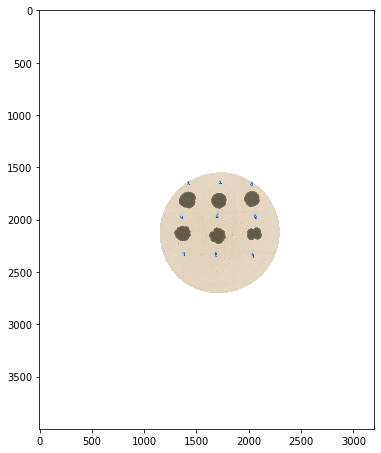

../Data/Serial/7-10_AM_P1C2_Serial.jpg


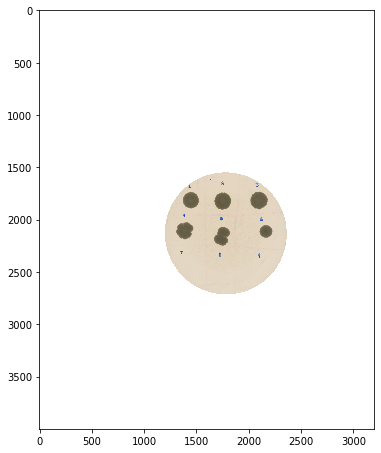

../Data/Serial/7-10_AM_P1C3_Serial.jpg


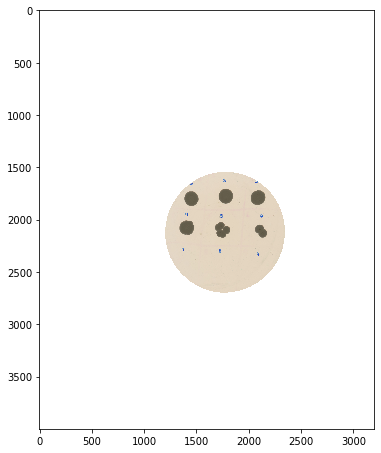

../Data/Serial/7-10_AM_P1C4_Serial.jpg


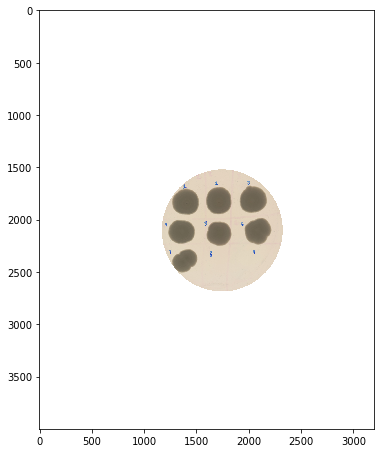

../Data/Serial/7-10_AM_P1C5_Serial.jpg


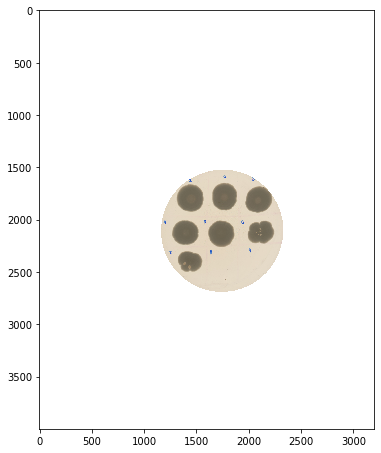

../Data/Serial/7-10_AM_P1C6_Serial.jpg


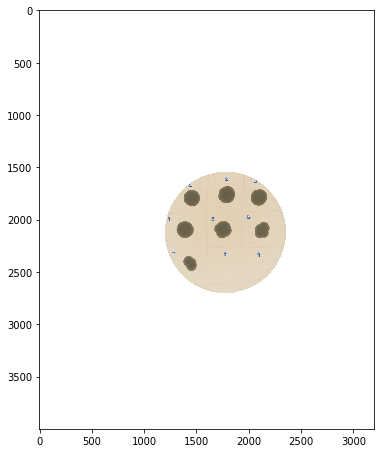

../Data/Serial/7-10_AM_P1C7_Serial.jpg


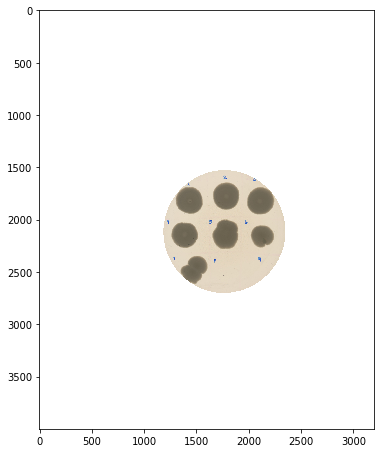

../Data/Serial/7-10_AM_P1C8_Serial.jpg


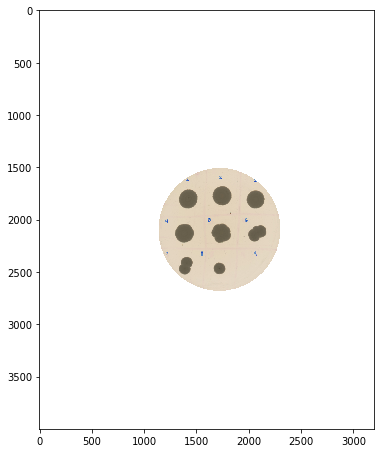

../Data/Serial/7-10_AM_P1C9_Serial.jpg


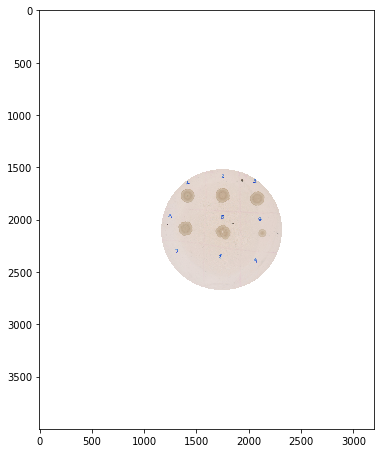

../Data/Serial/7-10_PM_P1C10_Serial.jpg


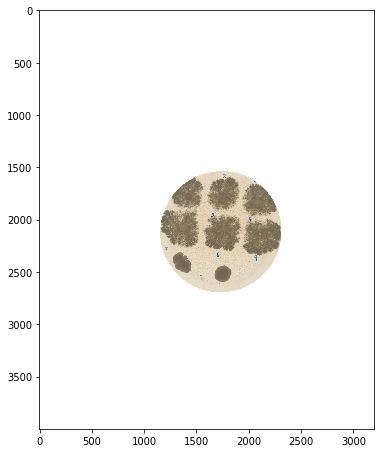

../Data/Serial/7-10_PM_P1C1_Serial.jpg


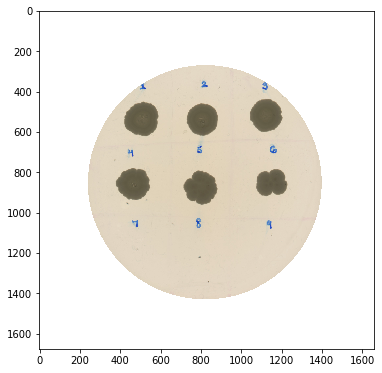

../Data/Serial/7-10_PM_P1C2_Serial.jpg


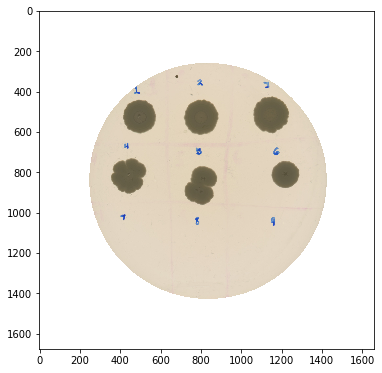

../Data/Serial/7-10_PM_P1C3_Serial.jpg


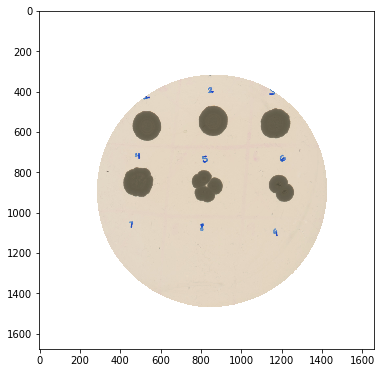

../Data/Serial/7-10_PM_P1C4_Serial.jpg


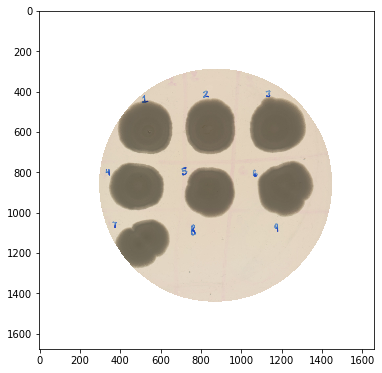

../Data/Serial/7-9_AM_P1C5_Serial.jpg


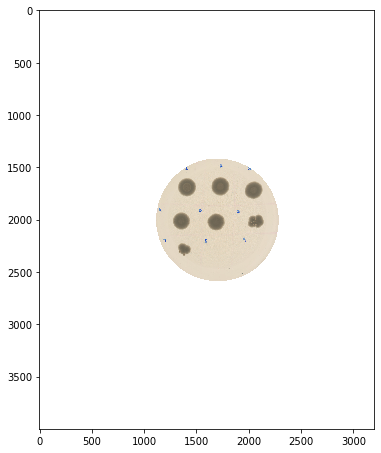

../Data/Serial/7-9_AM_P1C6_Serial.jpg


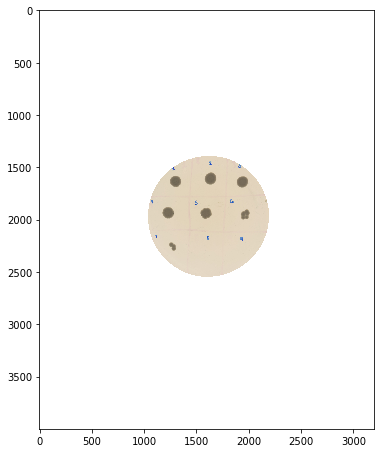

../Data/Serial/7-9_AM_P1C7_Serial.jpg


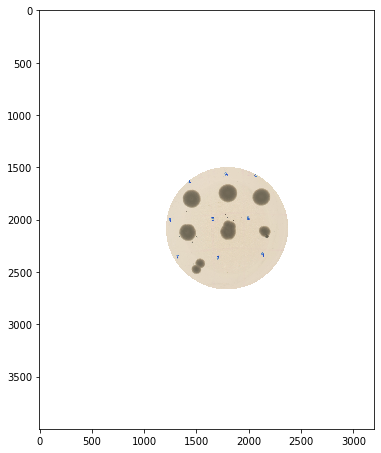

../Data/Serial/7-9_AM_P1C8_Serial.jpg


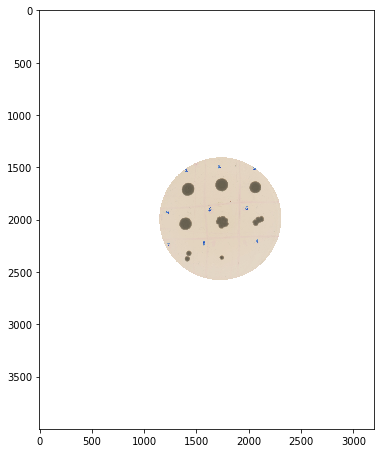

../Data/Serial/7-9_AM_P1C9_Serial.jpg


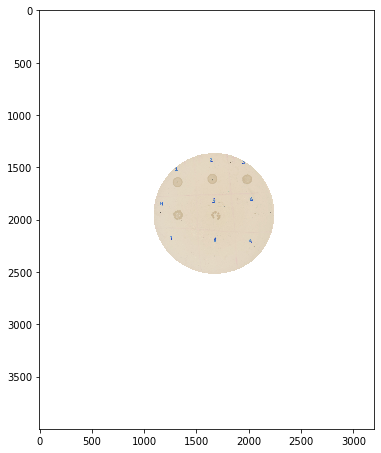

../Data/Serial/7-9_PM_P1C10_Serial.jpg


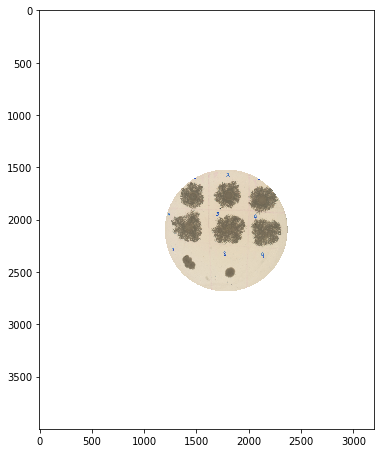

../Data/Serial/7-9_PM_P1C1_Serial.jpg


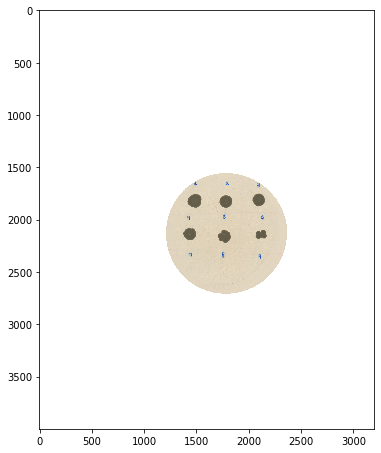

../Data/Serial/7-9_PM_P1C2_Serial.jpg


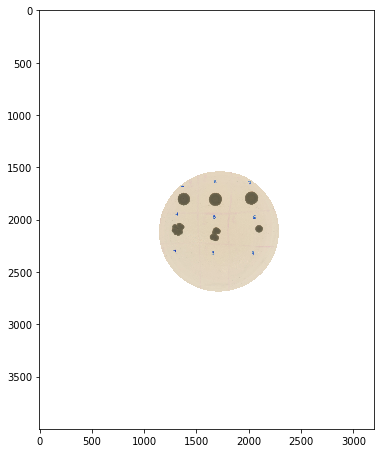

../Data/Serial/7-9_PM_P1C3_Serial.jpg


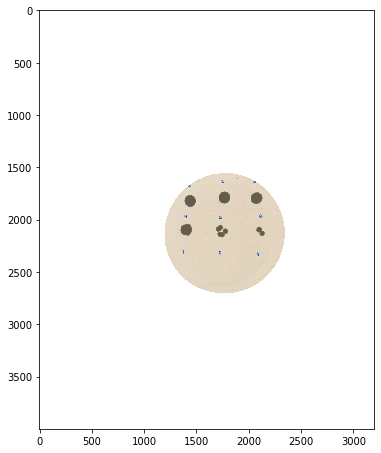

../Data/Serial/7-9_PM_P1C4_Serial.jpg


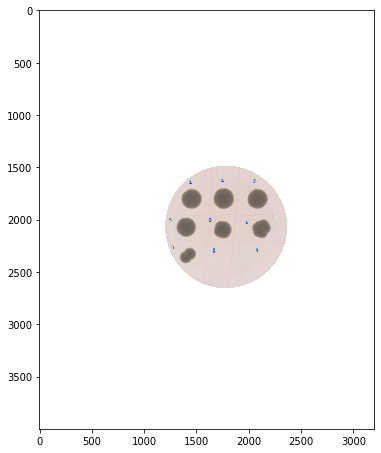

../Data/Serial/7-9_PM_P1C5_Serial.jpg


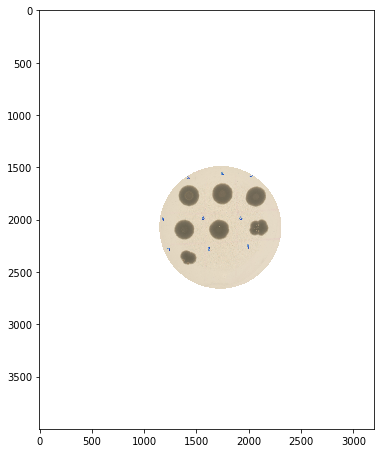

../Data/Serial/7-9_PM_P1C6_Serial.jpg


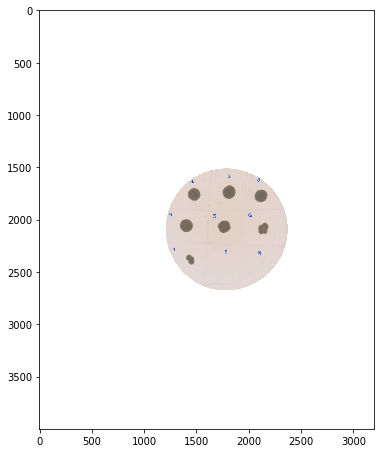

../Data/Serial/7-9_PM_P1C7_Serial.jpg


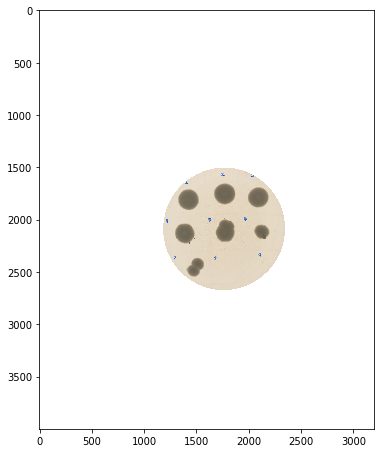

../Data/Serial/7-9_PM_P1C8_Serial.jpg


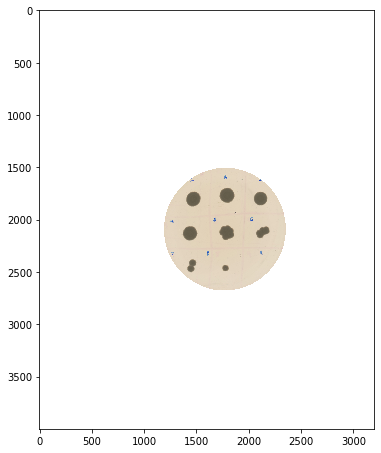

../Data/Serial/7-9_PM_P1C9_Serial.jpg


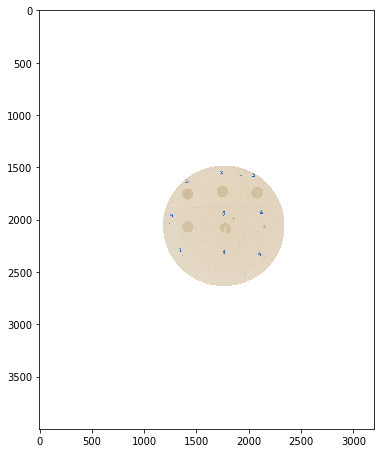

../Data/Serial/7-10_PM_P1C6_Serial.jpg


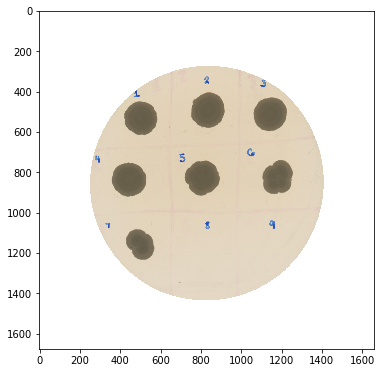

../Data/Serial/7-10_PM_P1C7_Serial.jpg


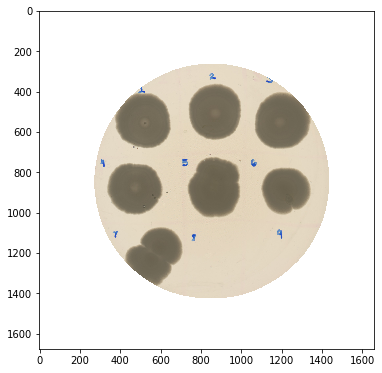

../Data/Serial/7-10_PM_P1C8_Serial.jpg


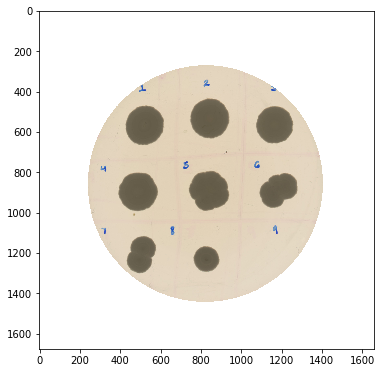

../Data/Serial/7-10_PM_P1C9_Serial.jpg


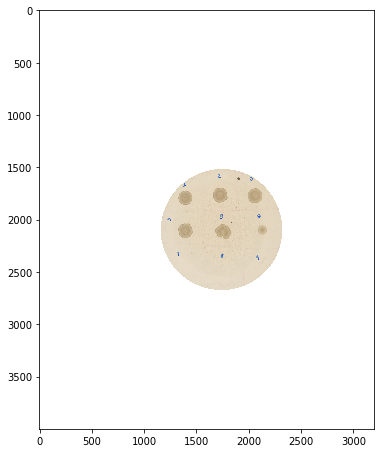

../Data/Serial/7-11_AM_P1C10_Serial.jpg


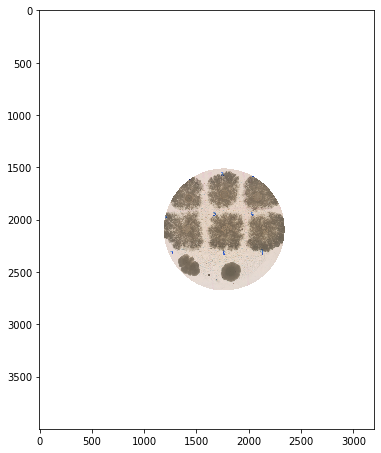

../Data/Serial/7-11_AM_P1C1_Serial.jpg


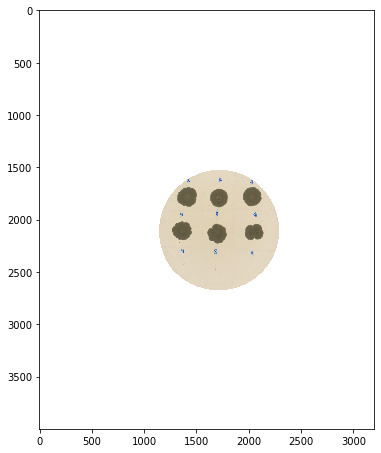

../Data/Serial/7-11_AM_P1C2_Serial.jpg


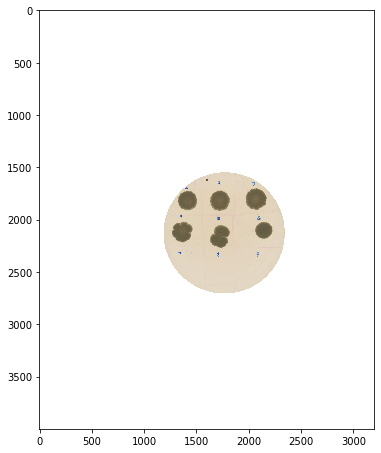

../Data/Serial/7-11_AM_P1C3_Serial.jpg


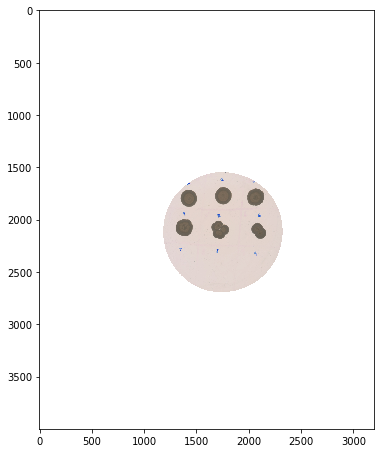

../Data/Serial/7-11_AM_P1C4_Serial.jpg


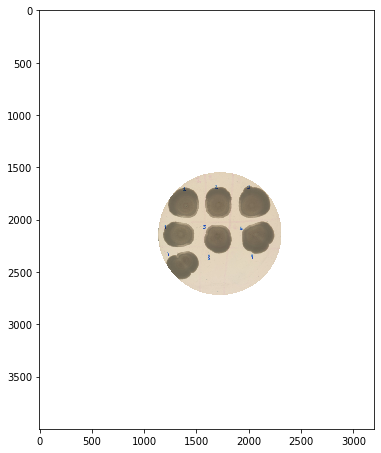

../Data/Serial/7-11_AM_P1C5_Serial.jpg


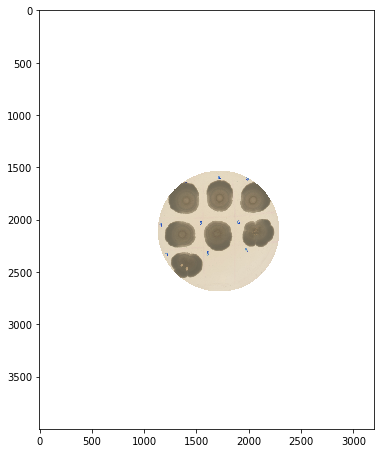

../Data/Serial/7-11_AM_P1C6_Serial.jpg


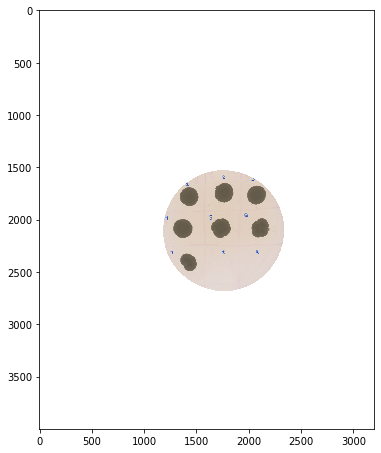

../Data/Serial/7-11_AM_P1C7_Serial.jpg


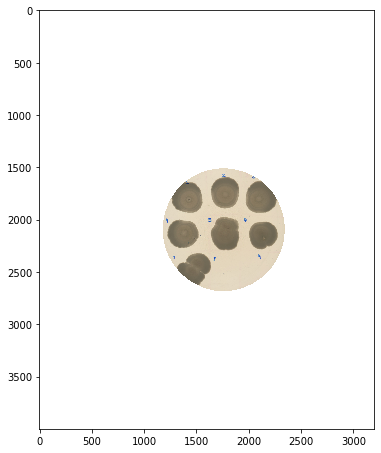

../Data/Serial/7-11_AM_P1C8_Serial.jpg


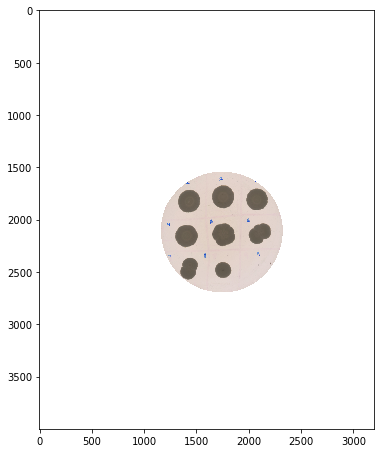

../Data/Serial/7-11_AM_P1C9_Serial.jpg


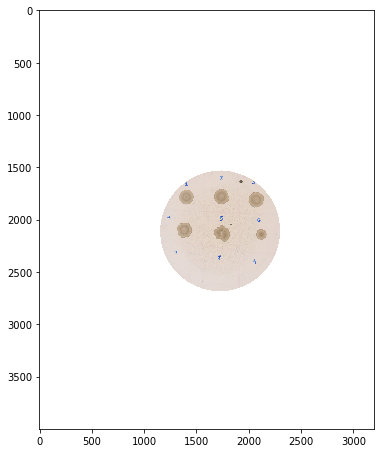

../Data/Serial/7-11_PM_P1C10_Serial.jpg


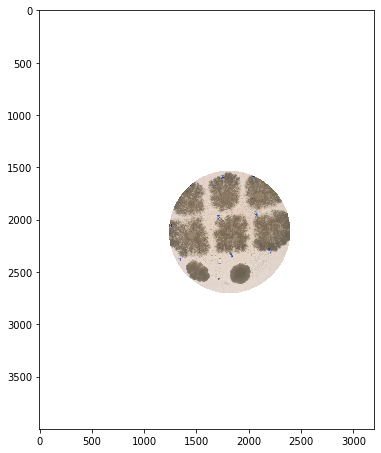

../Data/Serial/7-11_PM_P1C2_Serial.jpg


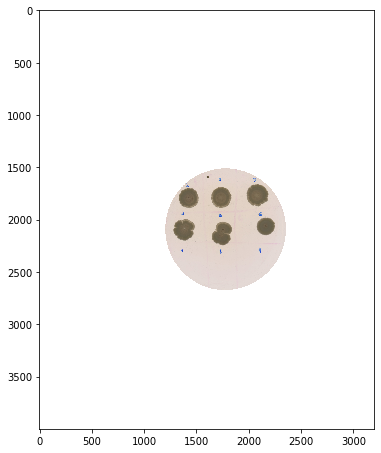

../Data/Serial/7-11_PM_P1C3_Serial.jpg


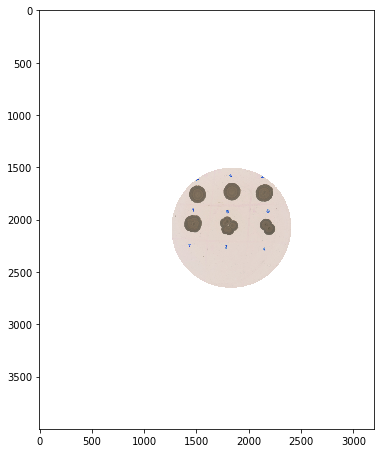

../Data/Serial/7-11_PM_P1C4_Serial.jpg


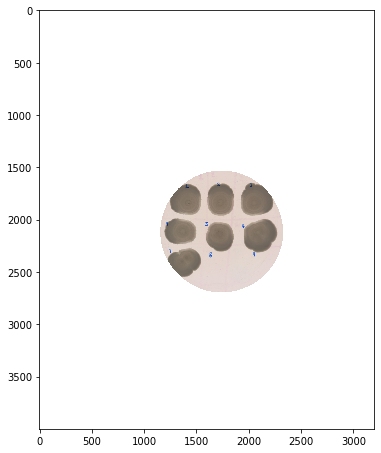

../Data/Serial/7-11_PM_P1C5_Serial.jpg


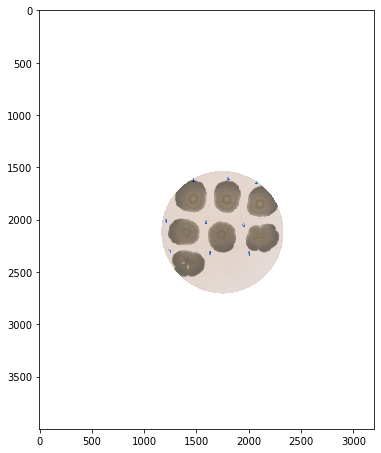

../Data/Serial/7-11_PM_P1C6_Serial.jpg


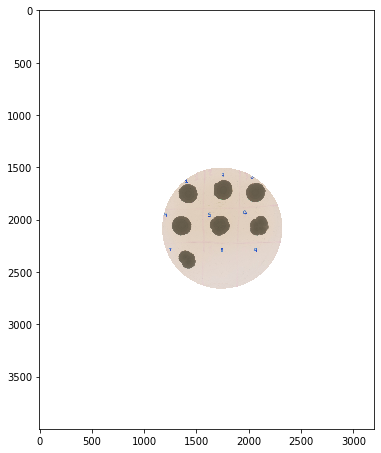

../Data/Serial/7-11_PM_P1C7_Serial.jpg


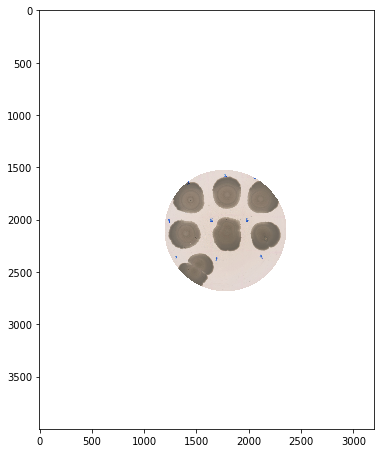

../Data/Serial/7-11_PM_P1C8_Serial.jpg


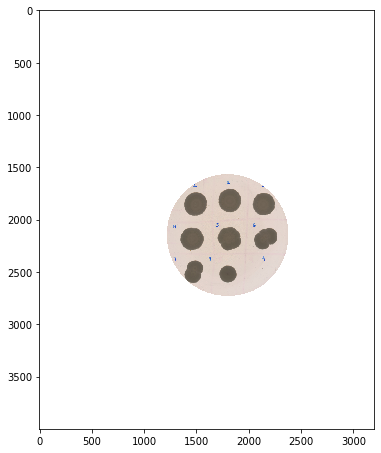

../Data/Serial/7-11_PM_P1C9_Serial.jpg


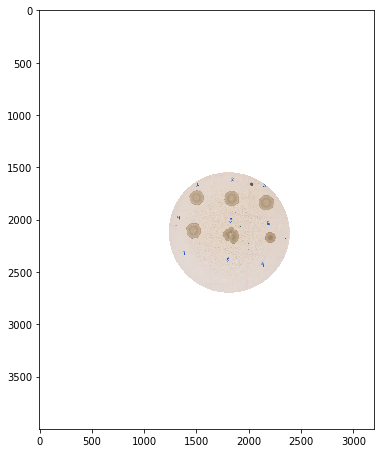

../Data/Serial/7-12_AM_P1C10_Serial.jpg


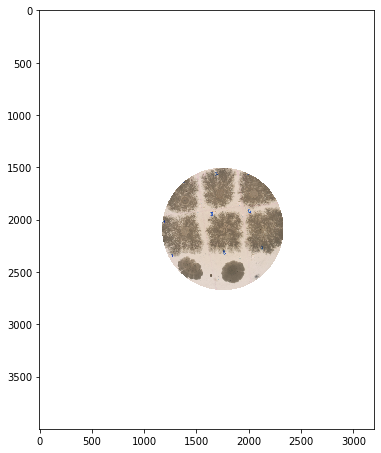

../Data/Serial/7-12_AM_P1C1_Serial.jpg


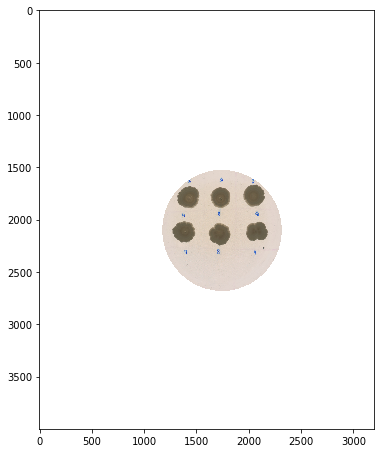

../Data/Serial/7-12_AM_P1C2_Serial.jpg


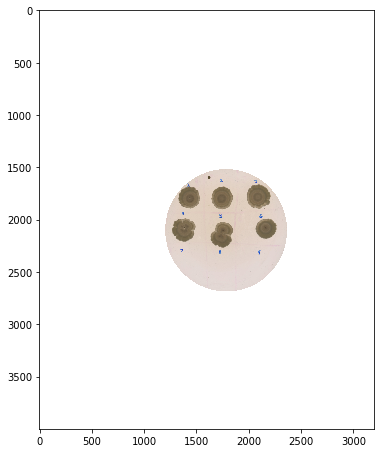

../Data/Serial/7-12_AM_P1C3_Serial.jpg


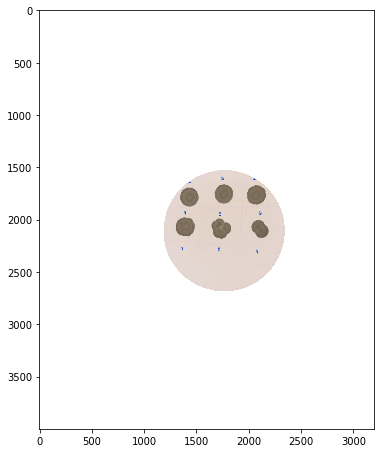

../Data/Serial/7-12_AM_P1C4_Serial.jpg


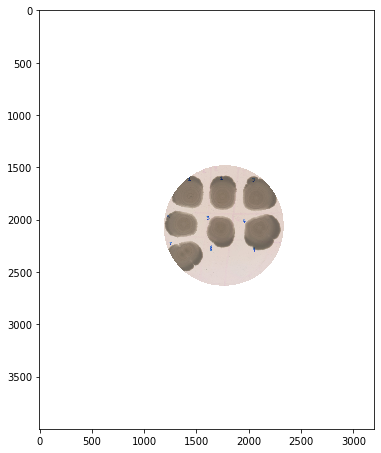

../Data/Serial/7-12_AM_P1C5_Serial.jpg


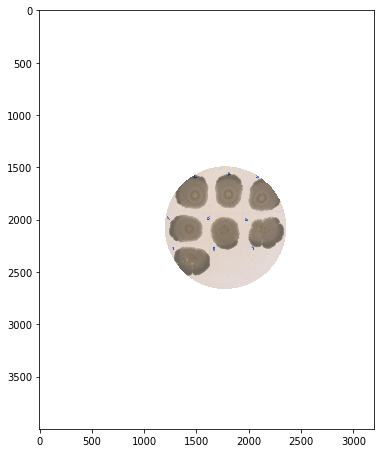

../Data/Serial/7-12_AM_P1C6_Serial.jpg


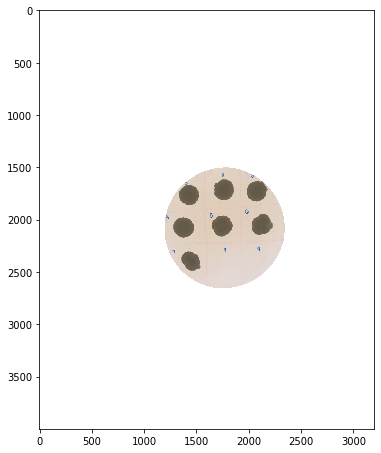

../Data/Serial/7-10_PM_P1C5_Serial.jpg


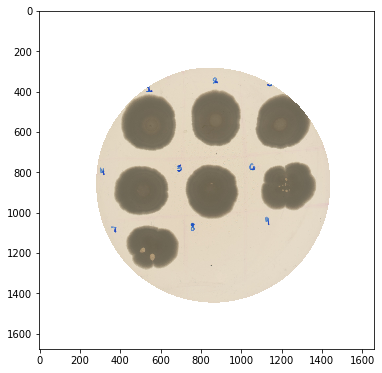

../Data/Serial/7-11_PM_P1C1_Serial.jpg


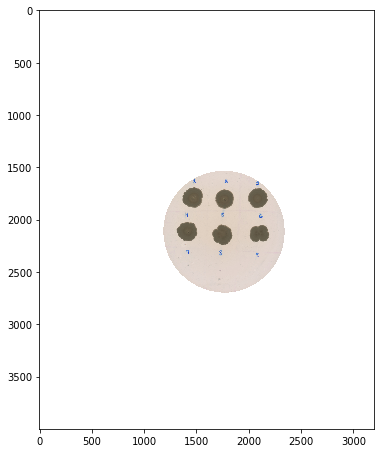

../Data/Serial/7-12_AM_P1C7_Serial.jpg


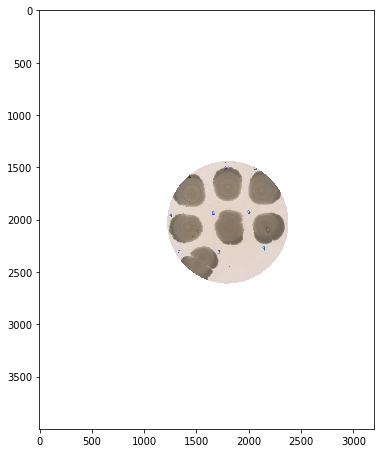

../Data/Serial/7-9_AM_P1C4_Serial.jpg


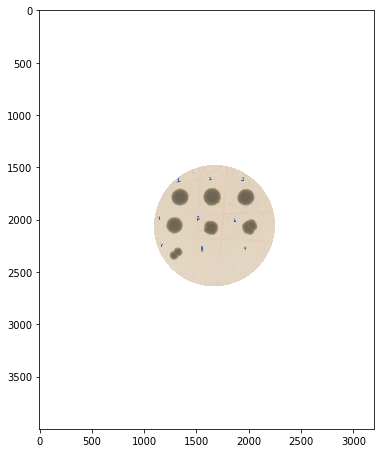

../Data/Serial/7-12_AM_P1C8_Serial.jpg


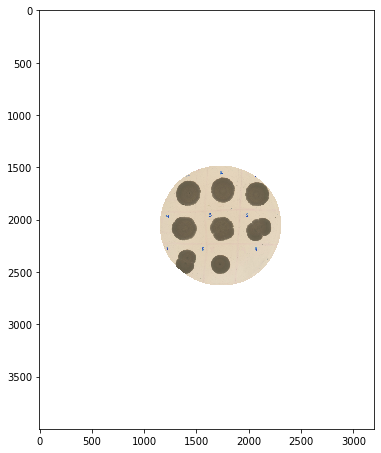

../Data/Serial/7-12_AM_P1C9_Serial.jpg


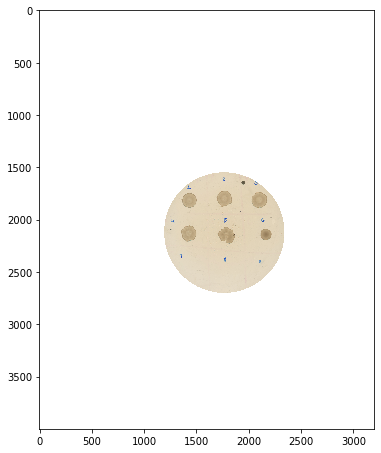

../Data/Serial/7-12_PM_P1C10_Serial.jpg


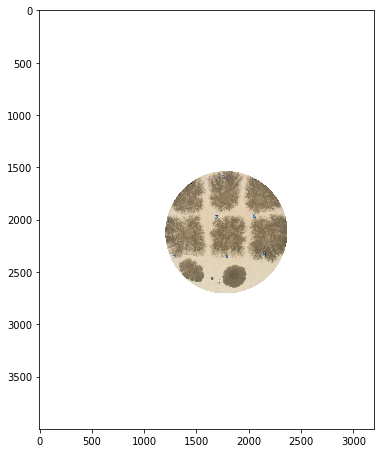

../Data/Serial/7-12_PM_P1C1_Serial.jpg


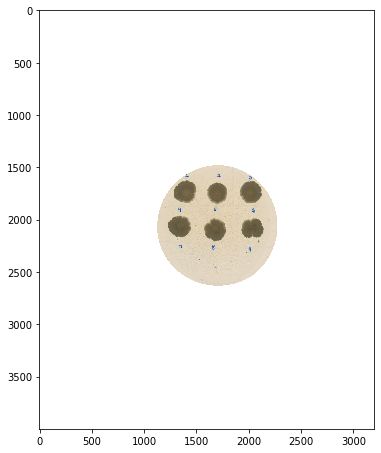

../Data/Serial/7-12_PM_P1C2_Serial.jpg


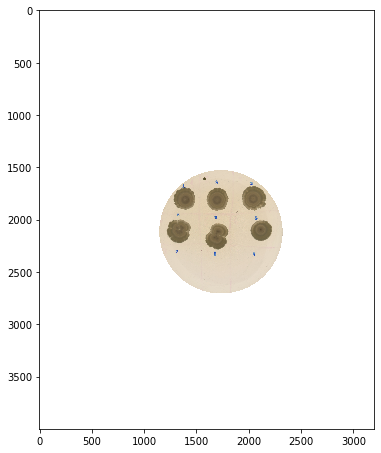

../Data/Serial/7-12_PM_P1C3_Serial.jpg


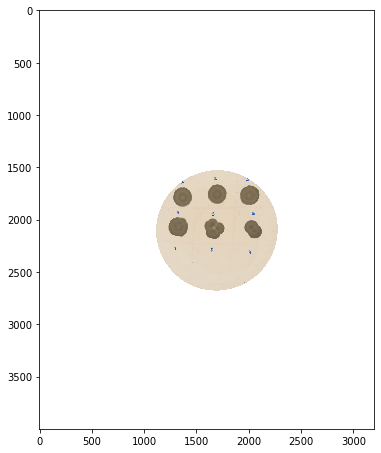

../Data/Serial/7-12_PM_P1C4_Serial.jpg


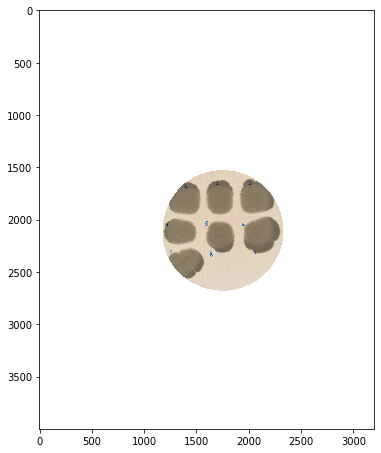

../Data/Serial/7-12_PM_P1C5_Serial.jpg


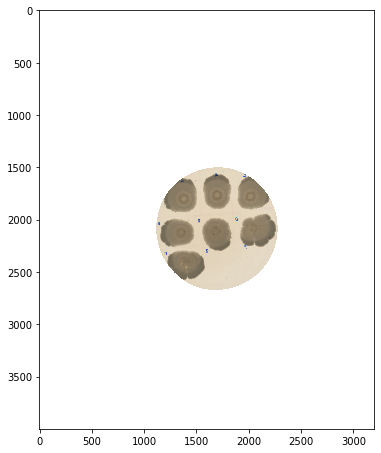

../Data/Serial/7-12_PM_P1C6_Serial.jpg


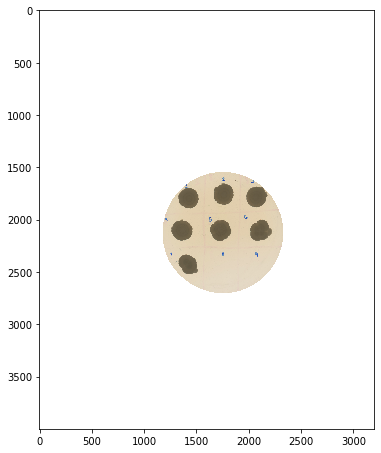

../Data/Serial/7-12_PM_P1C7_Serial.jpg


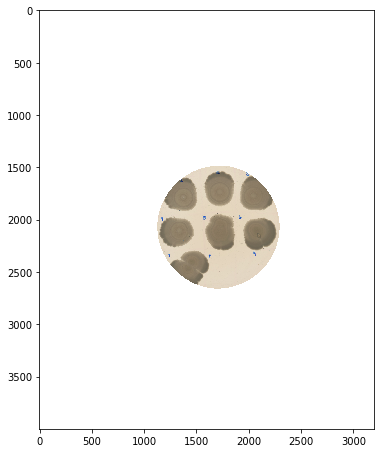

../Data/Serial/7-12_PM_P1C8_Serial.jpg


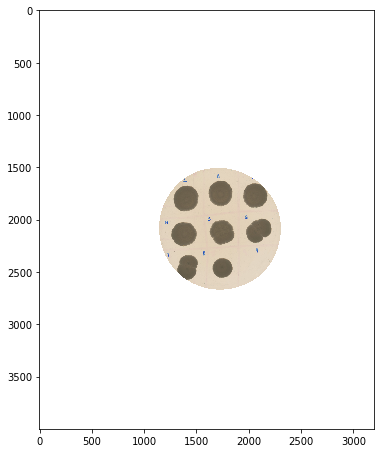

../Data/Serial/7-12_PM_P1C9_Serial.jpg


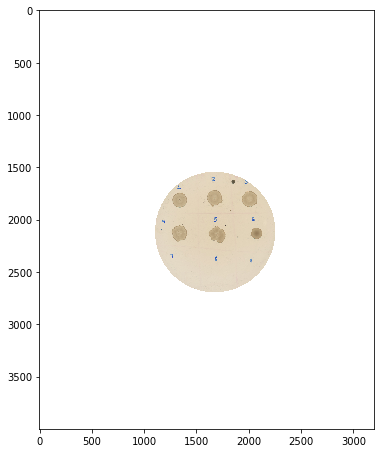

../Data/Serial/7-9_AM_P1C10_Serial.jpg


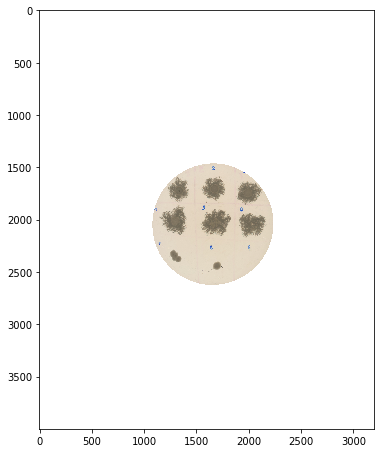

../Data/Serial/7-9_AM_P1C1_Serial.jpg


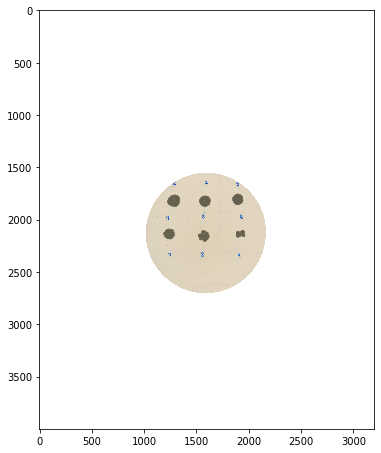

../Data/Serial/7-9_AM_P1C2_Serial.jpg


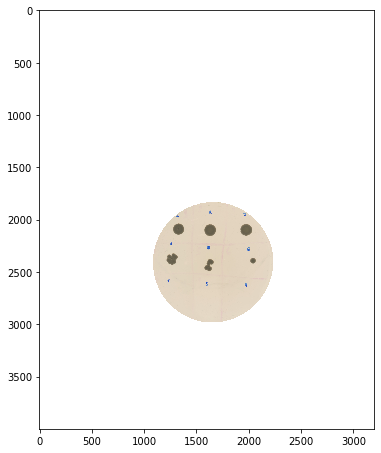

../Data/Serial/7-9_AM_P1C3_Serial.jpg


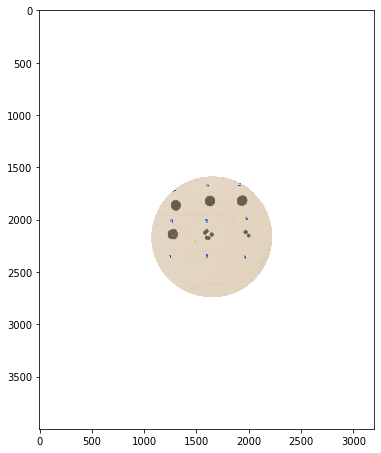

In [8]:
"""BE CAREFUL, this will replace previously pre-processed 'Serial' images"""

if 'no_dish_border' not in os.listdir('../Data'):
    os.mkdir('../Data/no_dish_border')
if 'Serial' not in os.listdir('../Data/no_dish_border'):
    os.mkdir('../Data/no_dish_border/Serial')
if 'no_blue_numbers' not in os.listdir('../Data/no_dish_border/Serial'):
    os.mkdir('../Data/no_dish_border/Serial/no_blue_numbers')

lower_range = np.array([128, 0, 0]) # lower blue (used to remove blue numbers)  
upper_range = np.array([255, 215, 136]) # higher blue (used to remove blue numbers)

folder = '../Data/Serial'
files = get_files(folder) # Returns array of all file_paths in the specified folder.

for im in files:
    print(im)
    img = cv2.imread(im, cv2.IMREAD_GRAYSCALE)
    shape = img.shape
    
    """Now we will identify circles within each image:"""
    if shape == (4000, 3200): # For 'Serial', we need 2 different parameters for the 2 different image sizes
        circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, dp=1.5, minDist=1e-12,
                               param1=530, param2=475, minRadius=625, maxRadius=750)
    if shape == (1676, 1660):
        circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, dp=1.5, minDist=1e-12,
                           param1=525, param2=470, minRadius=625, maxRadius=750)
    
    """create circles mask"""
    mask = np.zeros(img.shape) # Black image as initial mask. We will paint white outside the circles
    for x, y, r in circles[0]: # For each circle from the identified circles
        white = np.ones(img.shape, dtype=np.uint8)*255 # Create a 'white' image
        p = 40 # parameter to cut images. Adjusted for each location to ensure we completely remove borders
        if 'C4' in im or 'C6' in im or 'C10' in im: p = 35
        if 'C5' in im or 'C7' in im or 'C8' in im: p = 30
        cv2.circle(white, (x,y), int(r-p), 0, -1)  # 0, to paint black, -1 to draw black filled circles
        white[mask==255] = 0 # We won't add white pixels where there are already white pixels in the mask 
        mask = mask + white # Mask was black. Now pixels outside of circle will be white
    
    """In original image, remove pixels outside circles mask"""
    mask = mask.astype(int)
    color_img = cv2.imread(im)
    color_img[mask!=0] = 255 # set all pixels outside the mask to white color
       
    """show results and save image into folder '../Data/no_dish_border'"""
    plt.figure(figsize=(6,8))
    plt.imshow(color_img[:, :, [2, 1, 0]]) # From BGR to RGB
    plt.show()
    save_path = '../Data/no_dish_border' + im[7:]
    cv2.imwrite(save_path, color_img)
    
    """remove background blue colors and save"""
    mask = cv2.inRange(color_img,lower_range,upper_range) # new mask to identify blue pixels
    color_img[mask!=0] = 255
    save_path = '../Data/no_dish_border/Serial/no_blue_numbers' + im[14:]
    cv2.imwrite(save_path, color_img)

## Remove petri-dish border from 'Streak' type Images.

../Data/Streak/7-10_AM_P1C10_Streak.jpg


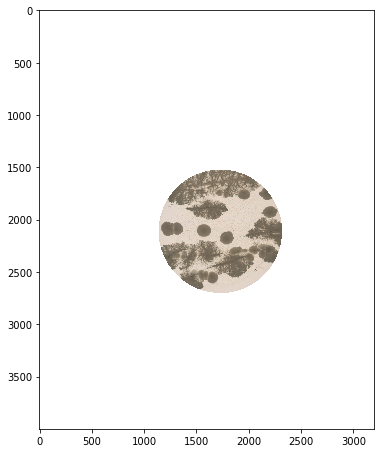

../Data/Streak/7-10_AM_P1C1_Streak.jpg


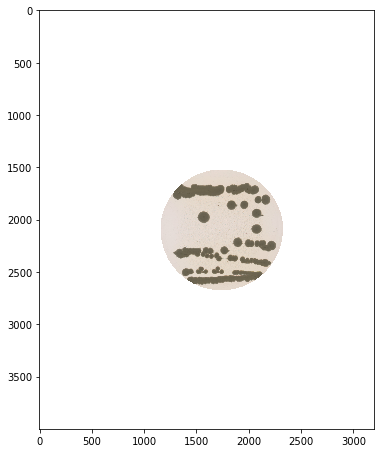

../Data/Streak/7-10_AM_P1C2_Streak.jpg


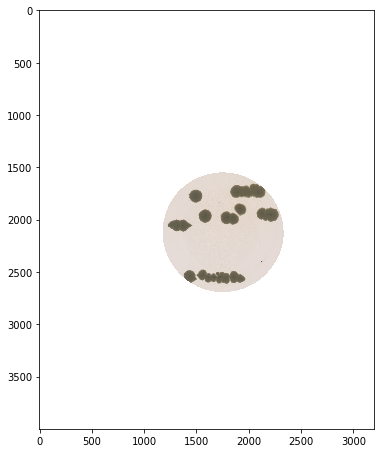

../Data/Streak/7-10_AM_P1C3_Streak.jpg


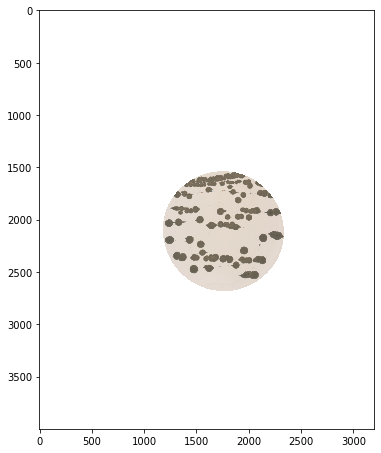

../Data/Streak/7-10_AM_P1C4_Streak.jpg


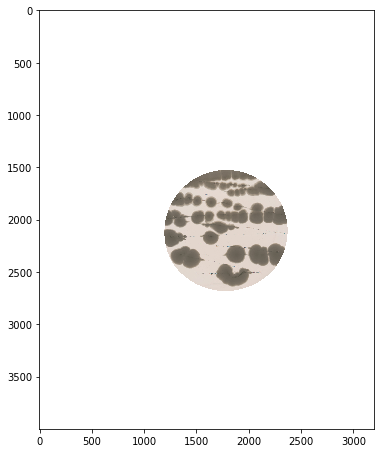

../Data/Streak/7-10_AM_P1C5_Streak.jpg


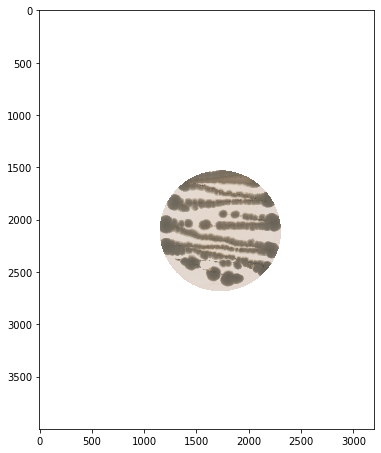

../Data/Streak/7-10_AM_P1C6_Streak.jpg


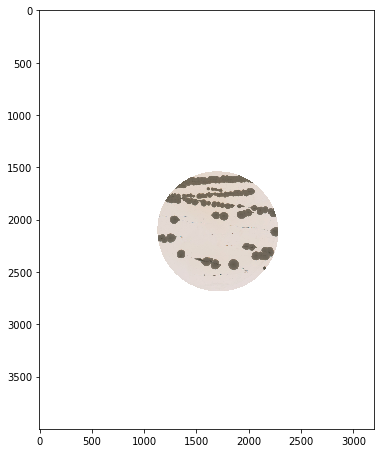

../Data/Streak/7-10_AM_P1C7_Streak.jpg


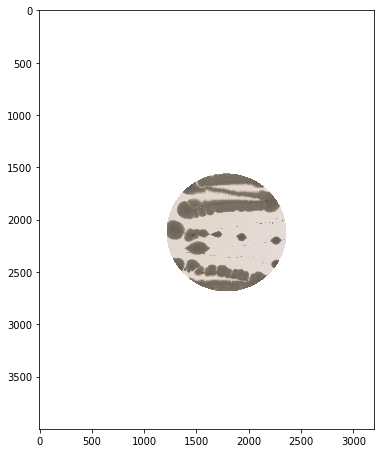

../Data/Streak/7-10_AM_P1C8_Streak.jpg


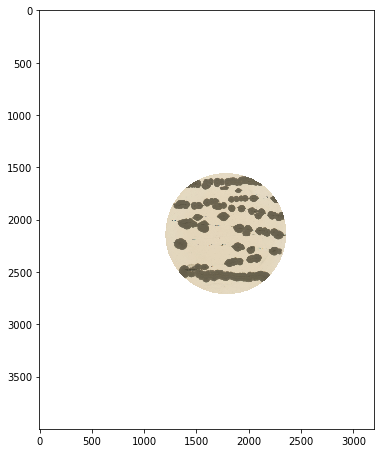

../Data/Streak/7-10_AM_P1C9_Streak.jpg


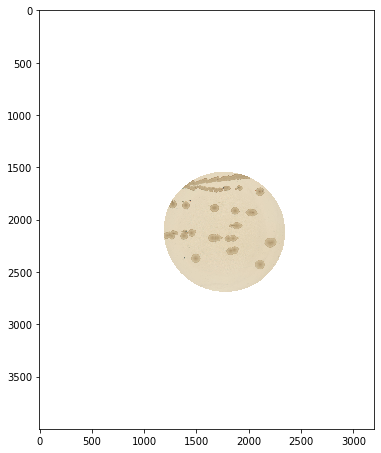

../Data/Streak/7-10_PM_P1C10_Streak.jpg


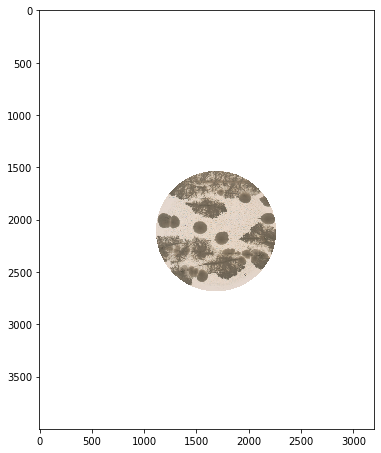

../Data/Streak/7-10_PM_P1C1_Streak.jpg


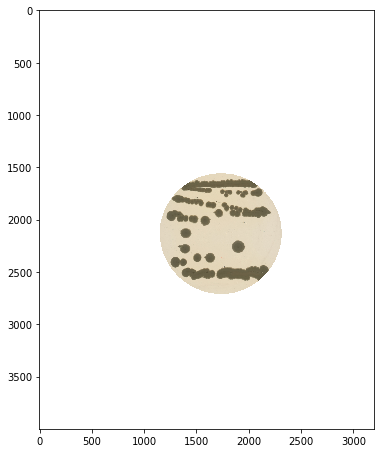

../Data/Streak/7-10_PM_P1C2_Streak.jpg


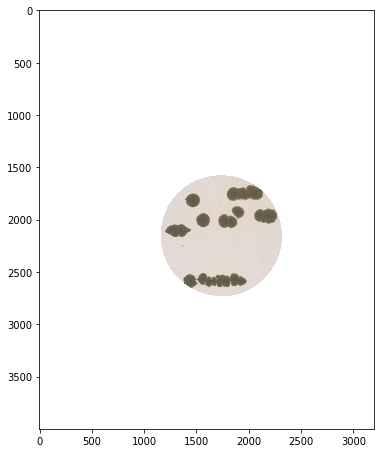

../Data/Streak/7-10_PM_P1C3_Streak.jpg


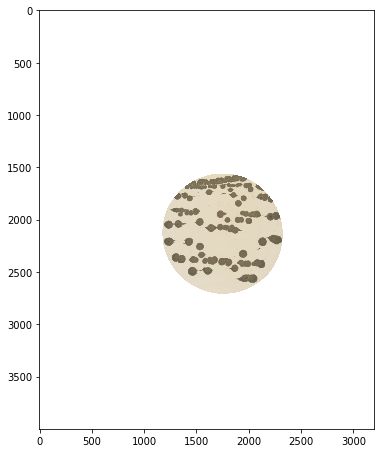

../Data/Streak/7-10_PM_P1C4_Streak.jpg


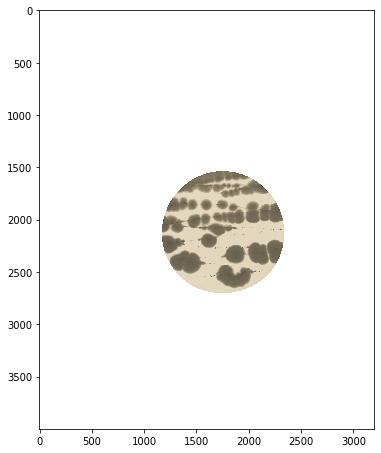

../Data/Streak/7-9_AM_P1C5_Streak.jpg


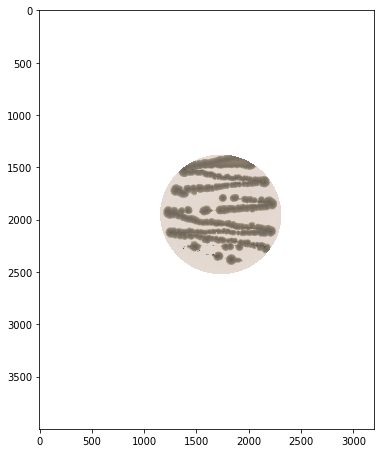

../Data/Streak/7-9_AM_P1C6_Streak.jpg


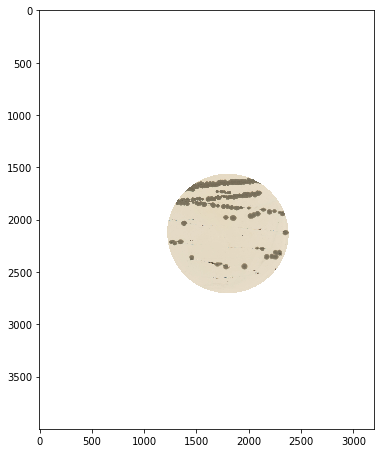

../Data/Streak/7-9_AM_P1C7_Streak.jpg


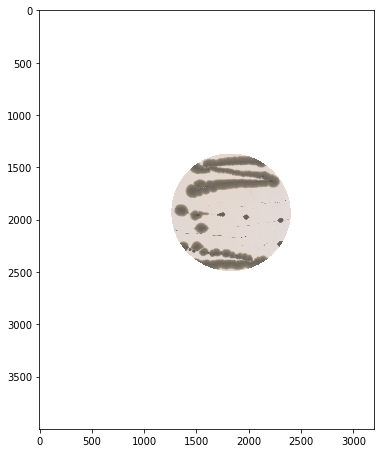

../Data/Streak/7-9_AM_P1C8_Streak.jpg


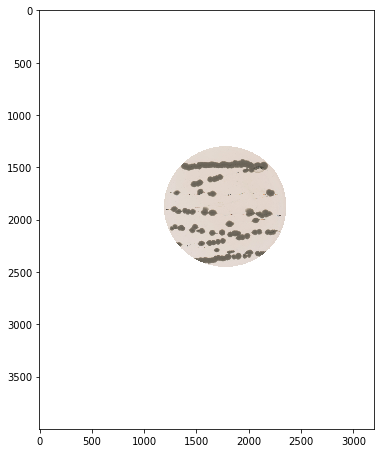

../Data/Streak/7-9_AM_P1C9_Streak.jpg


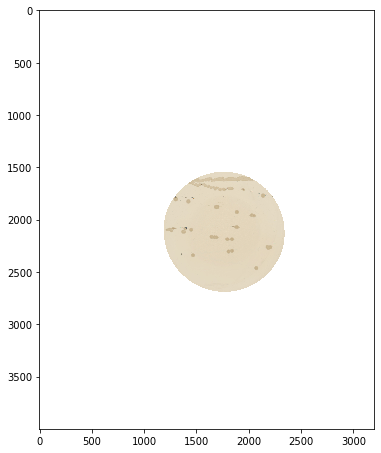

../Data/Streak/7-9_PM_P1C10_Streak.jpg


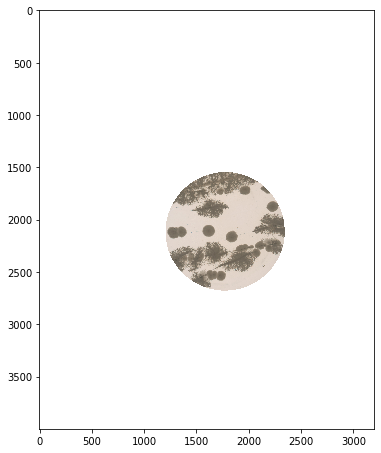

../Data/Streak/7-9_PM_P1C1_Streak.jpg


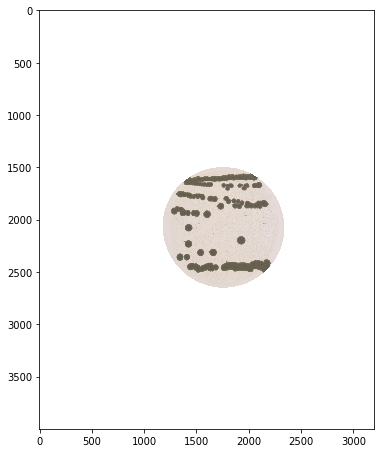

../Data/Streak/7-9_PM_P1C2_Streak.jpg


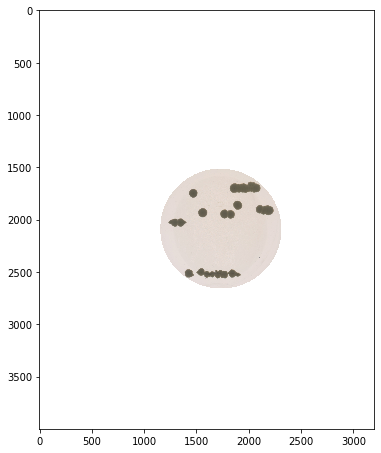

../Data/Streak/7-9_PM_P1C3_Streak.jpg


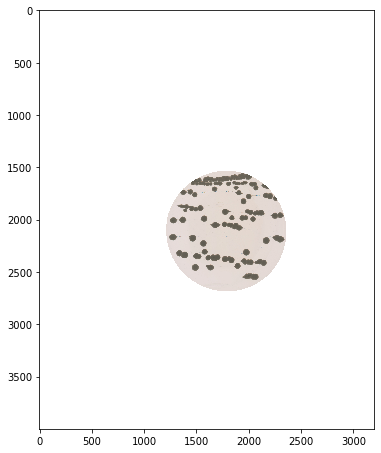

../Data/Streak/7-9_PM_P1C4_Streak.jpg


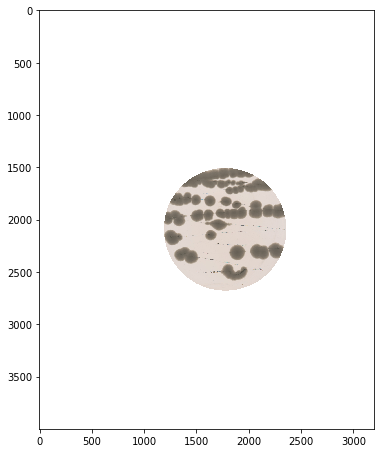

../Data/Streak/7-9_PM_P1C5_Streak.jpg


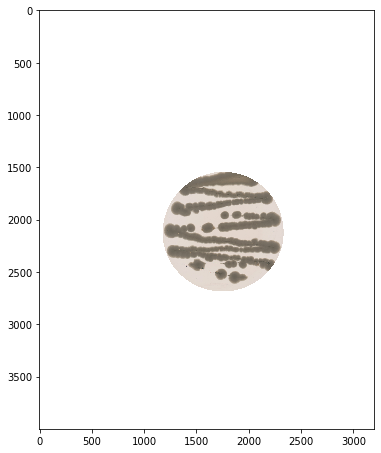

../Data/Streak/7-9_PM_P1C6_Streak.jpg


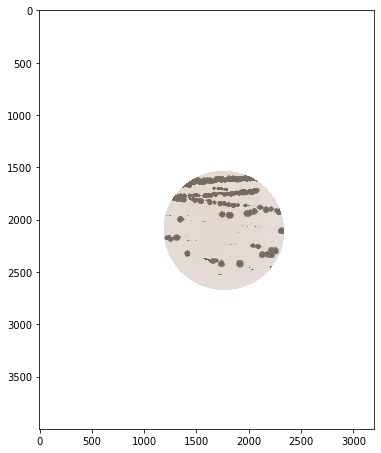

../Data/Streak/7-9_PM_P1C7_Streak.jpg


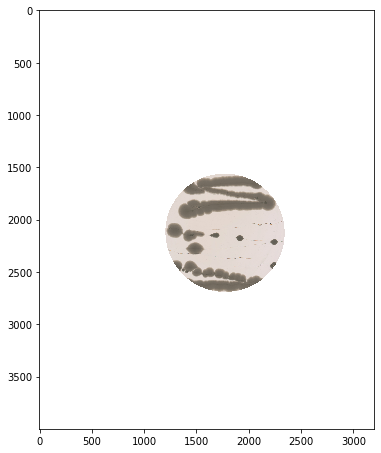

../Data/Streak/7-9_PM_P1C8_Streak.jpg


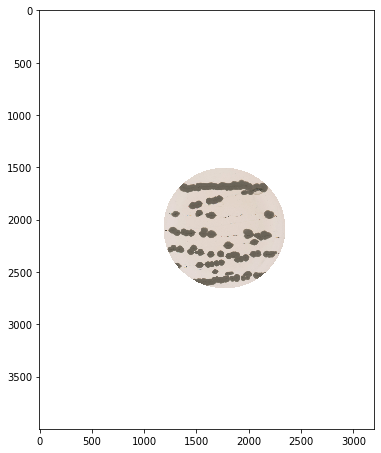

../Data/Streak/7-9_PM_P1C9_Streak.jpg


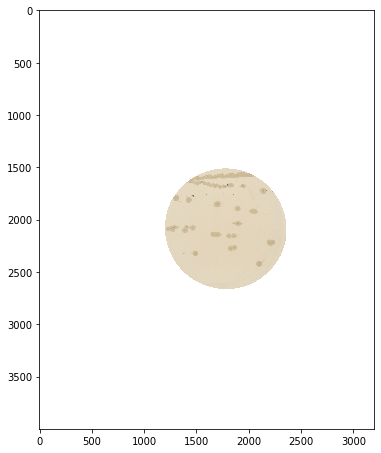

../Data/Streak/7-10_PM_P1C6_Streak.jpg


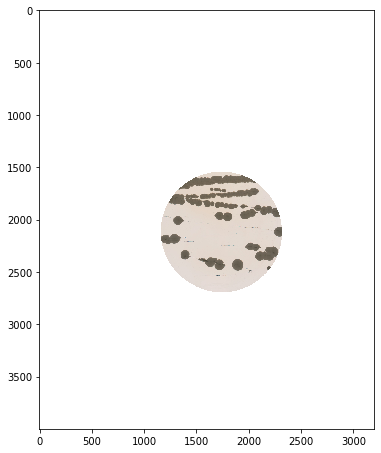

../Data/Streak/7-10_PM_P1C7_Streak.jpg


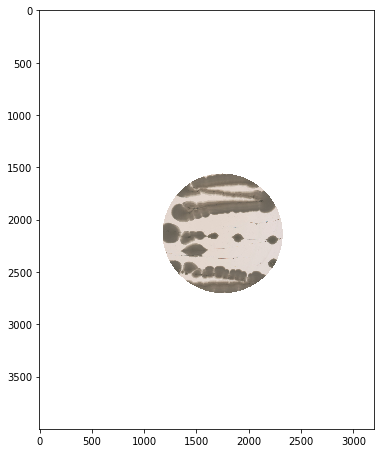

../Data/Streak/7-10_PM_P1C8_Streak.jpg


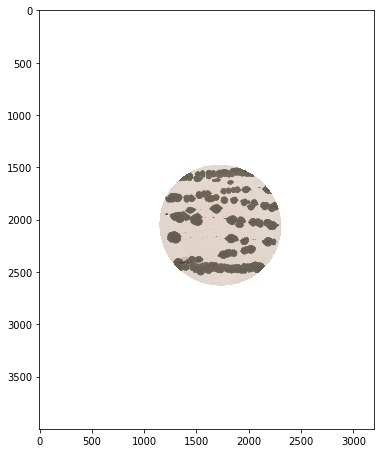

../Data/Streak/7-10_PM_P1C9_Streak.jpg


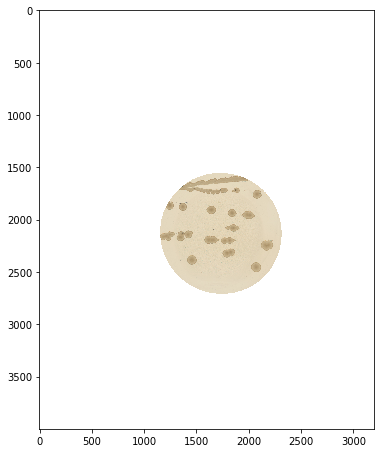

../Data/Streak/7-11_AM_P1C10_Streak.jpg


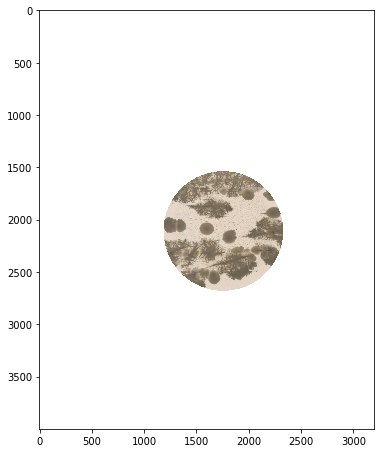

../Data/Streak/7-11_AM_P1C1_Streak.jpg


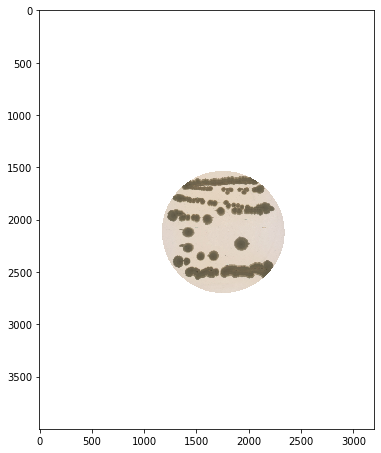

../Data/Streak/7-11_AM_P1C2_Streak.jpg


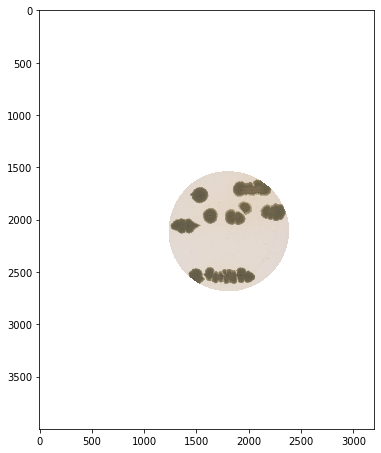

../Data/Streak/7-11_AM_P1C3_Streak.jpg


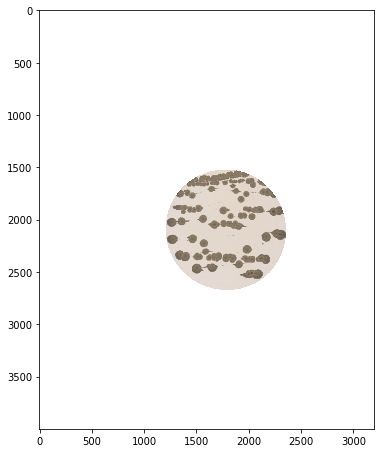

../Data/Streak/7-11_AM_P1C4_Streak.jpg


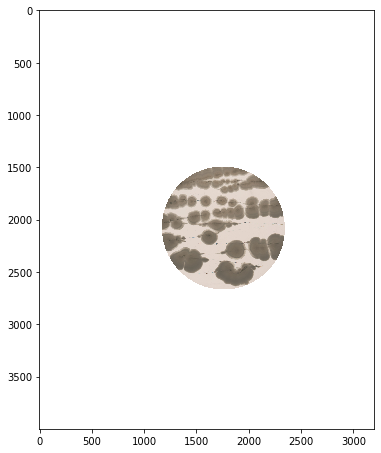

../Data/Streak/7-11_AM_P1C5_Streak.jpg


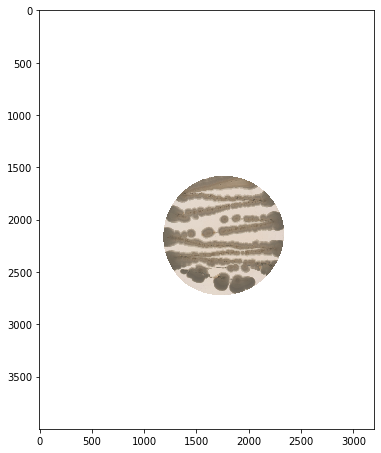

../Data/Streak/7-11_AM_P1C6_Streak.jpg


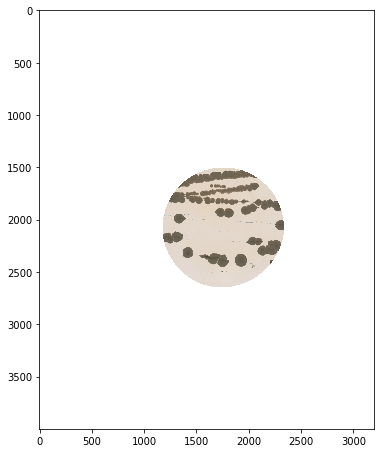

../Data/Streak/7-11_AM_P1C7_Streak.jpg


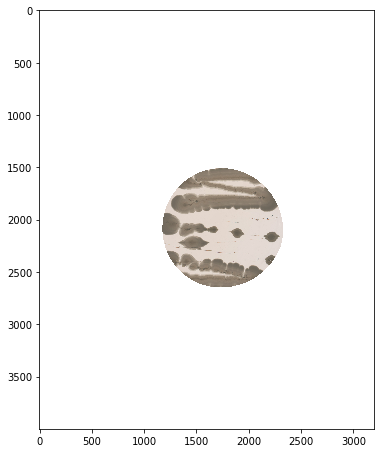

../Data/Streak/7-11_AM_P1C8_Streak.jpg


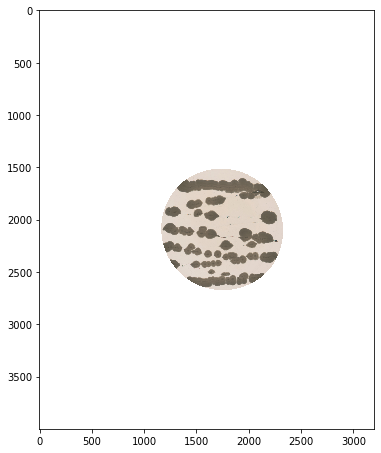

../Data/Streak/7-11_AM_P1C9_Streak.jpg


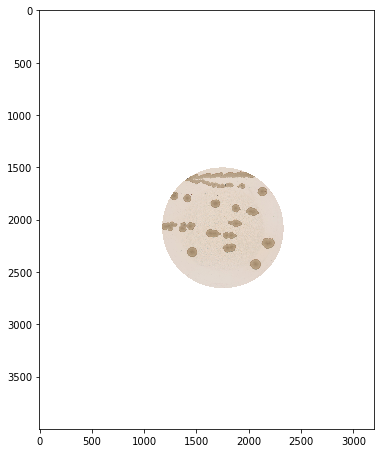

../Data/Streak/7-11_PM_P1C10_Streak.jpg


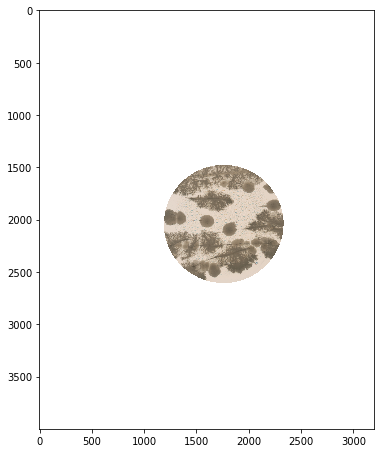

../Data/Streak/7-11_PM_P1C2_Streak.jpg


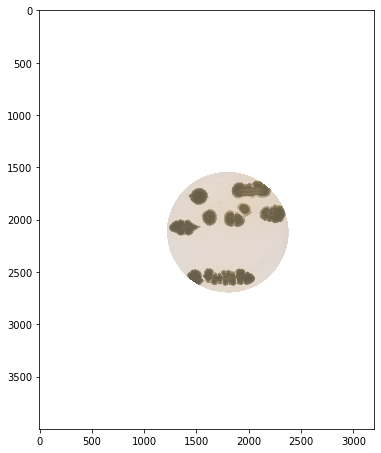

../Data/Streak/7-11_PM_P1C3_Streak.jpg


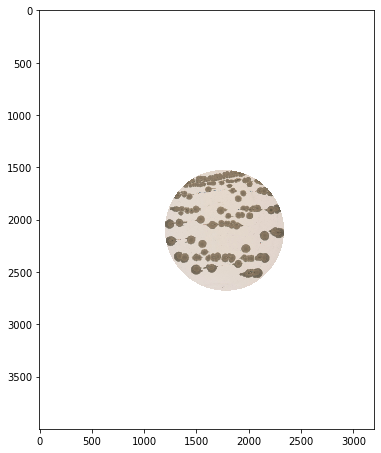

../Data/Streak/7-11_PM_P1C4_Streak.jpg


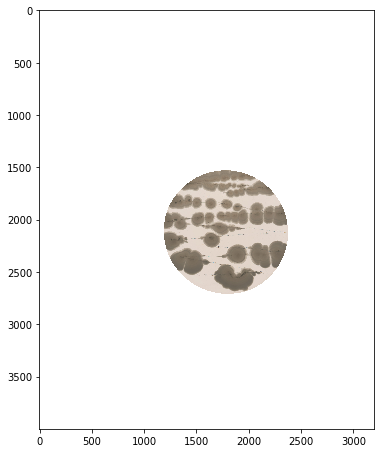

../Data/Streak/7-11_PM_P1C5_Streak.jpg


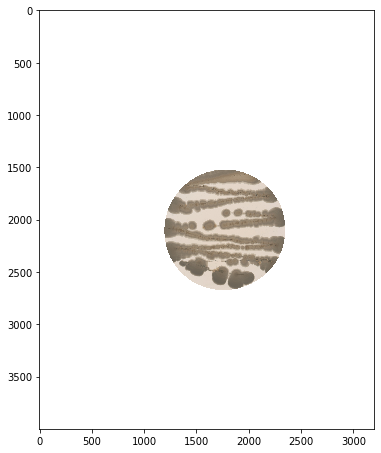

../Data/Streak/7-11_PM_P1C6_Streak.jpg


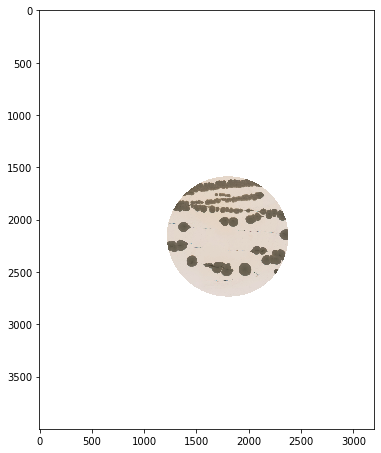

../Data/Streak/7-11_PM_P1C7_Streak.jpg


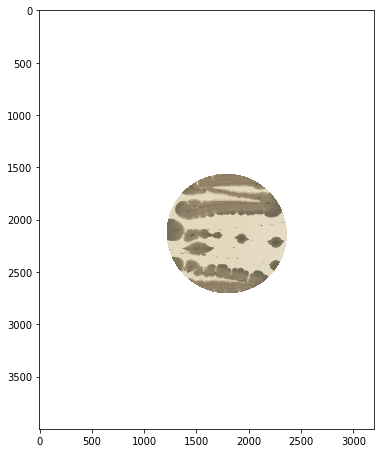

../Data/Streak/7-11_PM_P1C8_Streak.jpg


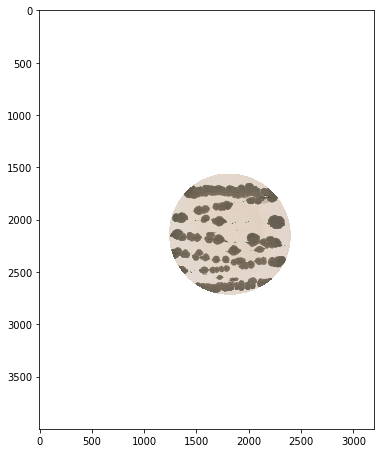

../Data/Streak/7-11_PM_P1C9_Streak.jpg


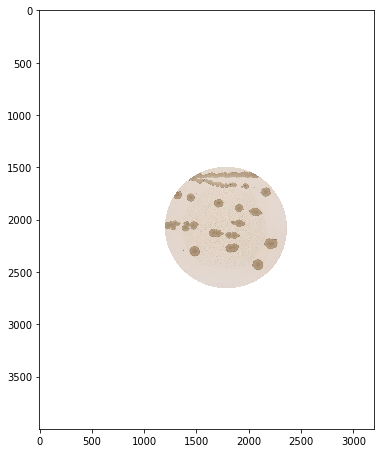

../Data/Streak/7-12_AM_P1C10_Streak.jpg


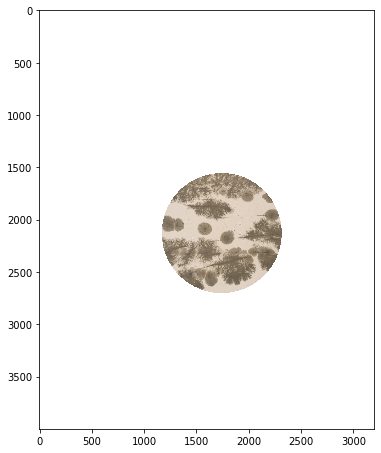

../Data/Streak/7-12_AM_P1C1_Streak.jpg


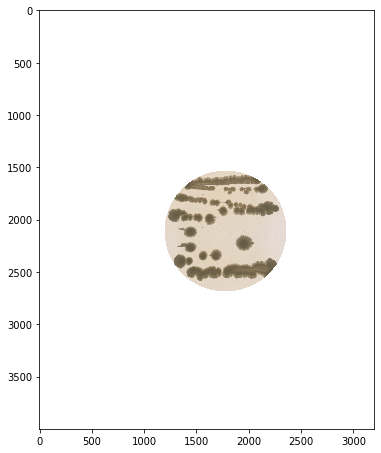

../Data/Streak/7-12_AM_P1C2_Streak.jpg


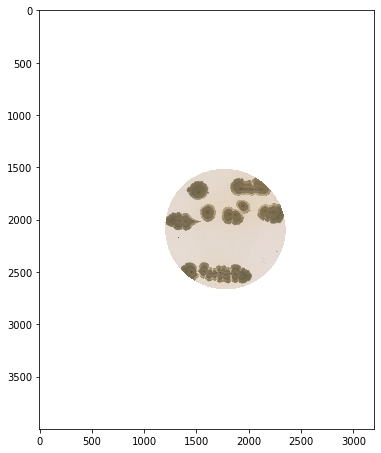

../Data/Streak/7-12_AM_P1C3_Streak.jpg


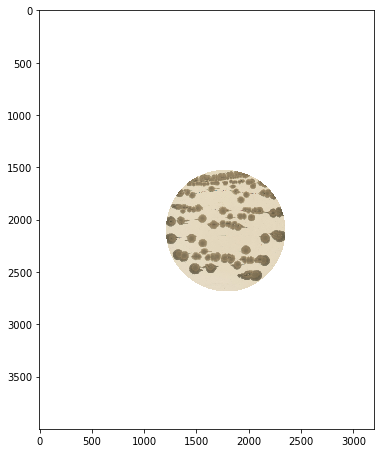

../Data/Streak/7-12_AM_P1C4_Streak.jpg


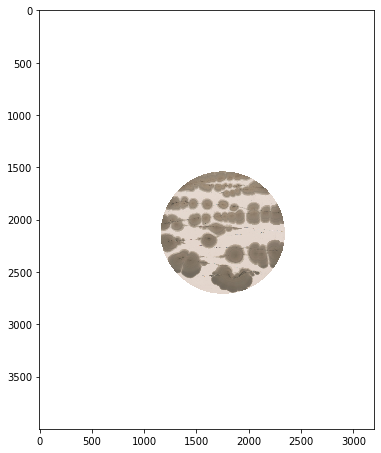

../Data/Streak/7-12_AM_P1C5_Streak.jpg


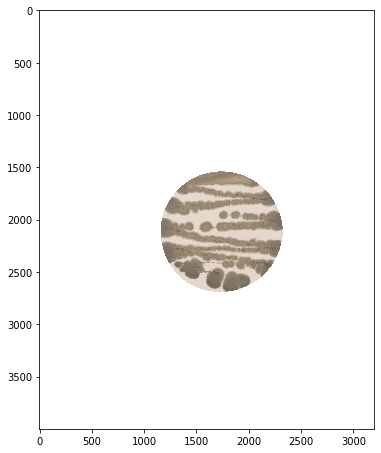

../Data/Streak/7-12_AM_P1C6_Streak.jpg


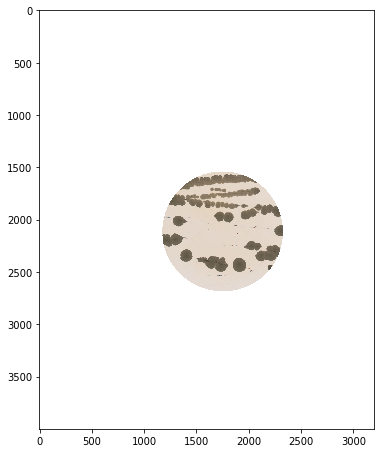

../Data/Streak/7-10_PM_P1C5_Streak.jpg


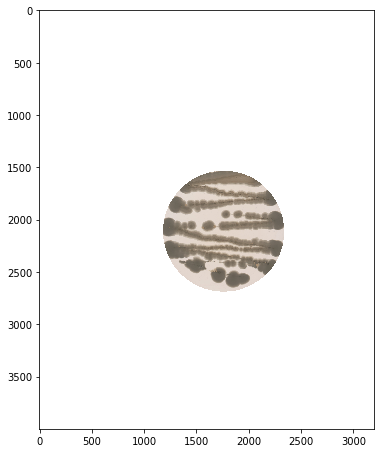

../Data/Streak/7-11_PM_P1C1_Streak.jpg


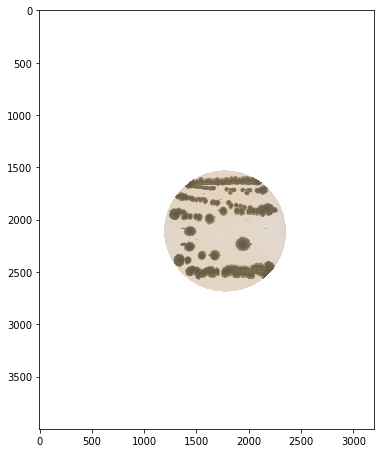

../Data/Streak/7-12_AM_P1C7_Streak.jpg


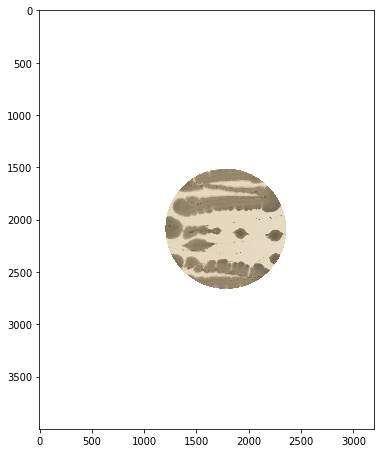

../Data/Streak/7-9_AM_P1C4_Streak.jpg


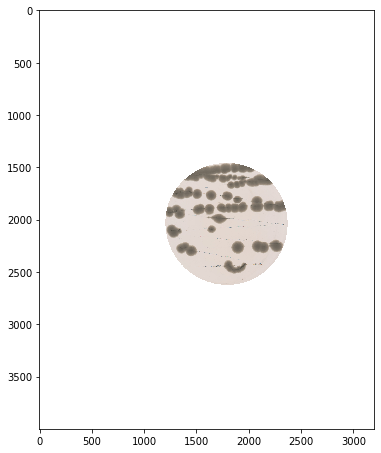

../Data/Streak/7-12_AM_P1C8_Streak.jpg


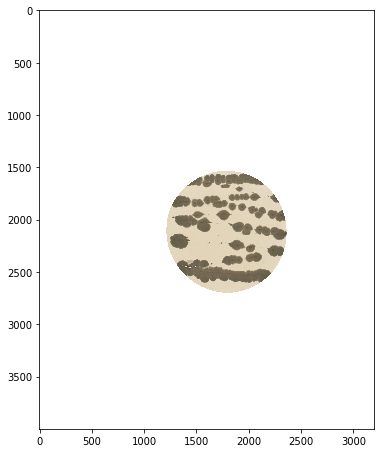

../Data/Streak/7-12_AM_P1C9_Streak.jpg


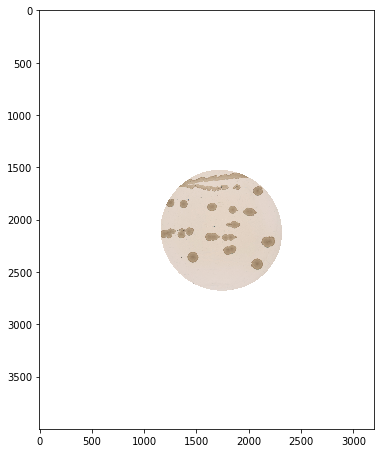

../Data/Streak/7-12_PM_P1C10_Streak.jpg


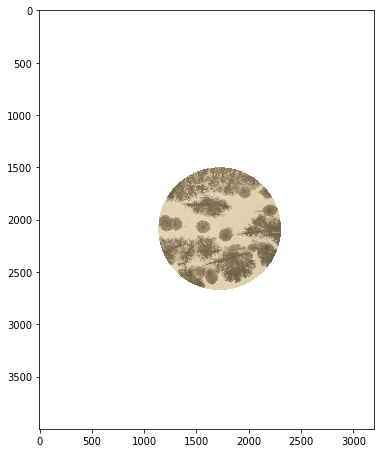

../Data/Streak/7-12_PM_P1C1_Streak.jpg


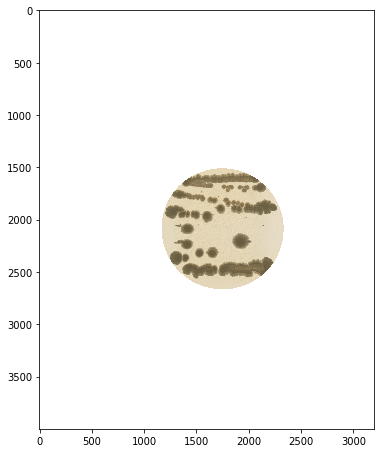

../Data/Streak/7-12_PM_P1C2_Streak.jpg


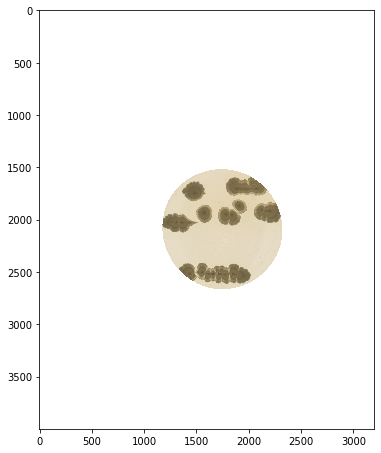

../Data/Streak/7-12_PM_P1C3_Streak.jpg


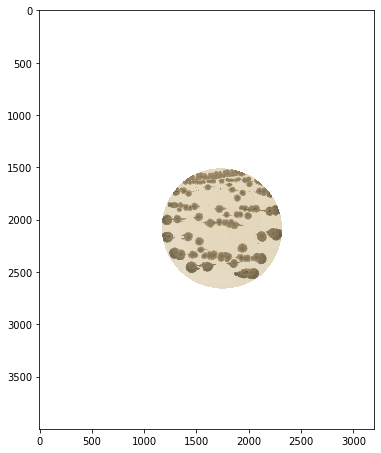

../Data/Streak/7-12_PM_P1C4_Streak.jpg


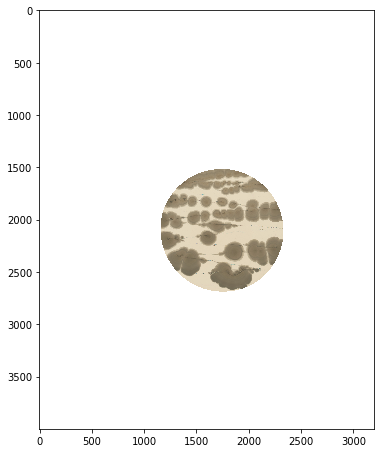

../Data/Streak/7-12_PM_P1C5_Streak.jpg


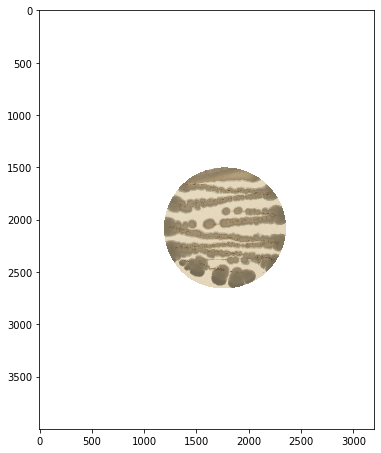

../Data/Streak/7-12_PM_P1C6_Streak.jpg


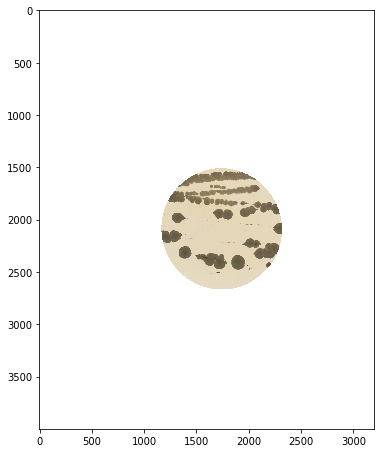

../Data/Streak/7-12_PM_P1C7_Streak.jpg


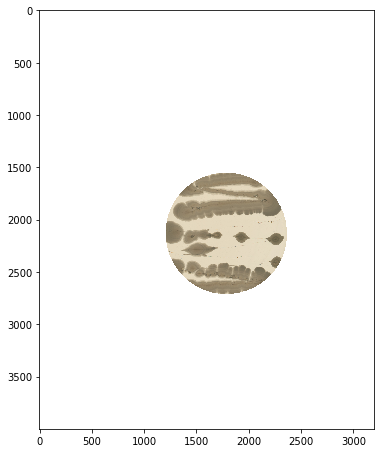

../Data/Streak/7-12_PM_P1C8_Streak.jpg


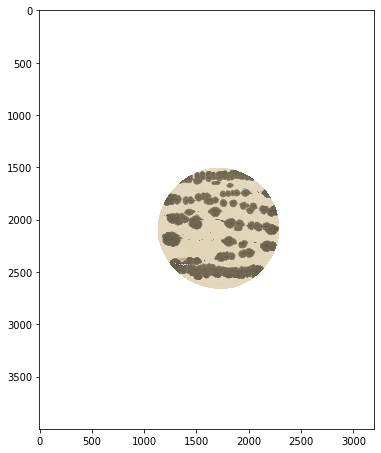

../Data/Streak/7-12_PM_P1C9_Streak.jpg


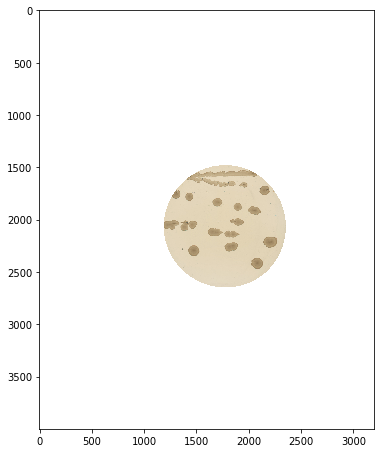

../Data/Streak/7-9_AM_P1C10_Streak.jpg


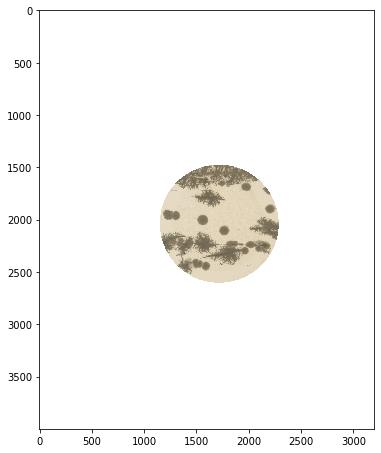

../Data/Streak/7-9_AM_P1C1_Streak.jpg


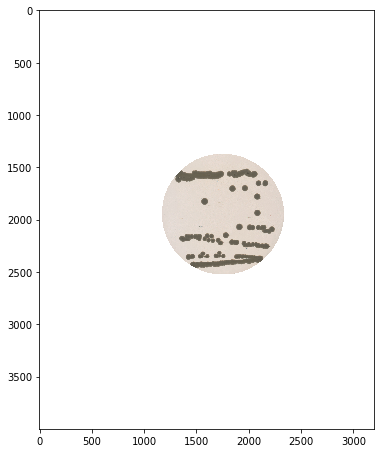

../Data/Streak/7-9_AM_P1C2_Streak.jpg


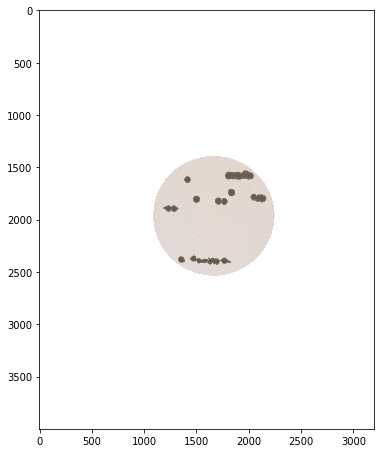

../Data/Streak/7-9_AM_P1C3_Streak.jpg


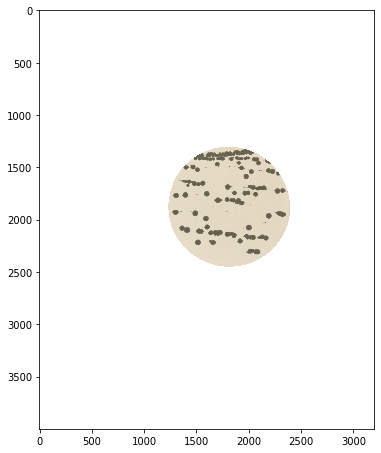

In [9]:
"""BE CAREFUL, this will replace previously pre-processed 'Streak' images"""

if 'no_dish_border' not in os.listdir('../Data'):
    os.mkdir('../Data/no_dish_border')
if 'Streak' not in os.listdir('../Data/no_dish_border'):
    os.mkdir('../Data/no_dish_border/Streak')

lower_range = np.array([128, 0, 0]) 
upper_range = np.array([255, 215, 136])

folder = '../Data/Streak'
files = get_files(folder) # Returns array of all file_paths in the specified folder.
    
for im in files:
    print(im)
    img = cv2.imread(im, cv2.IMREAD_GRAYSCALE)
    shape = img.shape
    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, dp=1.5, minDist=1e-12,
                               param1=489, param2=503, minRadius=615, maxRadius=715)
    
    """create circles mask"""
    mask = np.zeros(img.shape)
    for x, y, r in circles[0]:
        white = np.ones(img.shape, dtype=np.uint8)*255
        p = 25
        if 'C9' in im: p = 27
        if 'C2' in im or 'C3' in im or 'C5' in im or 'C6' in im: p = 30
        if 'C7' in im: p = 40
        if 'C10' in im: p = 45
        cv2.circle(white, (x,y), int(r-p), 0, -1)  
        white[mask==255] = 0 
        mask = mask + white
    
    """In original image, remove pixels outside circles mask"""
    mask = mask.astype(int)    
    color_img = cv2.imread(im)
    color_img[mask!=0] = 255
    
    """show results and save image into folder '../Data/no_dish_border'"""
    plt.figure(figsize=(6,8))
    plt.imshow(color_img[:, :, [2, 1, 0]]) # From BGR to RGB
    plt.show()
    save_path = '../Data/no_dish_border' + im[7:]
    cv2.imwrite(save_path, color_img)